# Chapter 11: Visualization with Matplotlib, Pandas, and Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Recipes

* [11.1 Getting started with matplotlib](#11.1-Getting-started-with-matplotlib)
* [11.2 Visualizing data with matplotlib](#11.2-Visualizing-data-with-matplotlib)
* [11.3 Plotting basics with pandas](#11.3-Plotting-basics-with-pandas)
* [11.4 Visualizing the flights dataset](#11.4-Visualizing-the-flights-dataset)
* [11.5 Stacking area charts to discover emerging trends](#11.5-Stacking-area-charts-to-discover-emerging-trends)
* [11.6 Understanding the differences between seaborn and pandas](#11.6-Understanding-the-differences-between-seaborn-and-pandas)
* [11.7 Doing multivariate analysis with seaborn grids](#11.7-Doing-multivariate-analysis-with-seaborn-grids)
* [11.8 Uncovering Simpson's paradox in the diamonds dataset with seaborn](#11.8-Uncovering-Simpson's-paradox-in-the-diamonds-dataset-with-seaborn)

# 11.1 Getting started with matplotlib

In [2]:
### [Tech] plt.subplots(), fig, ax, xaxis, yaxis, spine 등 
### [Goal] matplotlib의 기본 기능을 살펴본다. 

# >> Getting Ready

Text(0.5, 1.03, 'Figure Title')

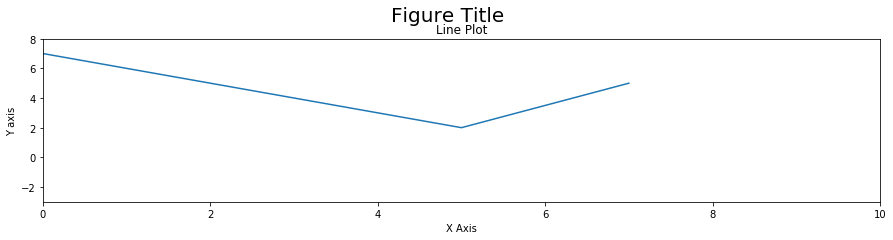

In [3]:
import matplotlib.pyplot as plt 

x = [-3, 5, 7]
y = [10, 2, 5]

""" stateful Interface """
plt.figure(figsize=(15,3))   # 그래프의 전체 도면
plt.plot(x, y)         # x, y를 표시, 기본값은 꺽은선
plt.xlim(0, 10)        # x 축 범위 지정
plt.ylim(-3, 8)        # y 축 범위 지정
plt.xlabel('X Axis')   # x 축 레이블 명
plt.ylabel('Y axis')   # y 축 레이블 명
plt.title('Line Plot')  # 차트 제목  (axe에 붙는다. )
plt.suptitle('Figure Title', size=20, y=1.03)  # 차트전체 제목 (Figure에 붙는다. )

Text(0.5, 1.03, 'Figure Title')

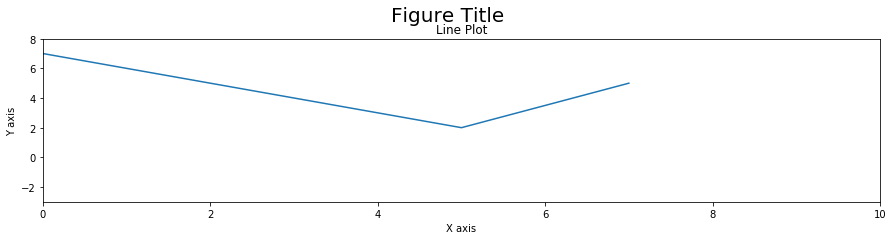

In [4]:
""" stateless Interface (fig, ax 객체의 사용 )"""
fig, ax = plt.subplots(figsize=(15,3))  # 그래프의 전체 도면
ax.plot(x, y)            # x, y를 표시, 기본값은 꺽은선
ax.set_xlim(0, 10)       # x 축 범위 지정, set_   으로 메소드 활용
ax.set_ylim(-3, 8)       # y 축 범위 지정
ax.set_xlabel('X axis')  # x 축 레이블 명
ax.set_ylabel('Y axis')  # y 축 레이블 명
ax.set_title('Line Plot')  # 차트 제목  (axe에 붙는다. )
fig.suptitle('Figure Title', size=20, y=1.03) # 차트전체 제목 (Figure에 붙는다. )

# >> How to do it...

In [5]:
# 11.1.1  matplotlib.pyplot을 plt라는 이름으로 읽어들인다. 
import matplotlib.pyplot as plt 

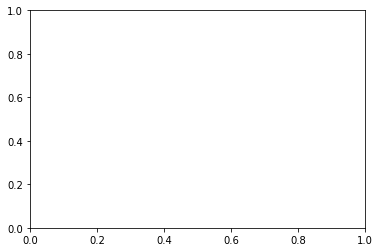

In [6]:
# 11.1.2 도화지에 해당하는 figure와 그 안에 차트인 axe 를 plt.subplots 함수로 생성하고
#        생성시 반환하는 fig, ax를 변수에 할당한다. 
fig, ax = plt.subplots(nrows=1, ncols=1)

In [7]:
# 11.1.3 fig, ax의 객체 type을 확인해 보자.
type(fig)

matplotlib.figure.Figure

In [8]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [9]:
# 11.1.4 그림 전체의 크기는 fig 객체를 통해 지정한다. 
# 현재 크기의 확인
fig.get_size_inches()

array([6., 4.])

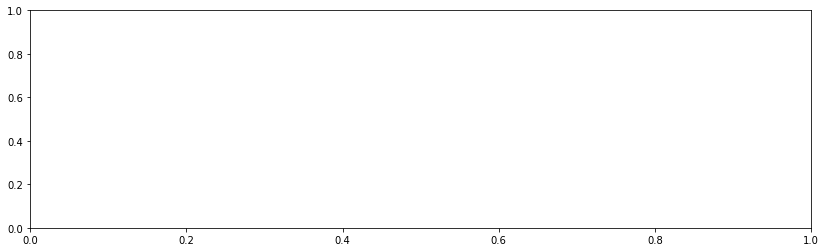

In [10]:
# 새로운 크기의 지정
fig.set_size_inches(14, 4)
fig

In [11]:
# 11.1.5 fig 는 axe의 목록을 갖는다. fig.axes 속성을 이용해서 axe 목록을 확인할 수 있다.
#      현재는 하나의 ax만 갖고 있다. 
fig.axes

In [12]:
# 11.1.6  fig.axes[0]  가 ax 변수에 할 달 되었다. 
#     (axe가 한 개 일때는 별도 인덱스 없이 바로 ax를 사용 할 수 있다.  ) 
fig.axes[0] is ax

True

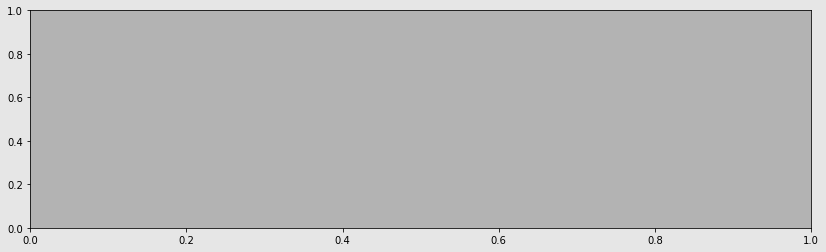

In [13]:
# 11.1.7 fig와 ax의 영역을 구분해보자. set_facecolor() 메소드를 사용한다. 
fig.set_facecolor('.9')
ax.set_facecolor('.7')
fig

In [14]:
# 11.1.8 Axe의 구성요소를 확인해 본다. 
# 경계선 4개 Spine
# X축 XAxis, Y축 YAxis,
# Text 들
ax_children = ax.get_children()
ax_children

 Text(0.5, 1, ''),
 Text(0.0, 1, ''),
 Text(1.0, 1, ''),

In [15]:
# 11.1.9 Spine의 객체 형태로 지정해서 살펴 본다. 객체 명이 바로 위와 같다.
spines = ax.spines
spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x2215d85dec8>),
             ('right', <matplotlib.spines.Spine at 0x2215d86ad88>),
             ('bottom', <matplotlib.spines.Spine at 0x2215d86ab88>),
             ('top', <matplotlib.spines.Spine at 0x2215d86ac08>)])

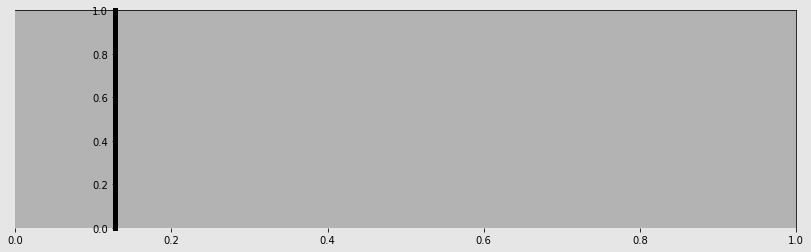

In [16]:
# 11.1.10 Spine을 조정해보자. 

# spine left의 위치 및 굵기 조정
spine_left = spines['left']
spine_left.set_position(('outward', -100))
spine_left.set_linewidth(5)

# spine bottom을 보이지 않게 함
spine_bottom = spines['bottom']
spine_bottom.set_visible(False)
fig

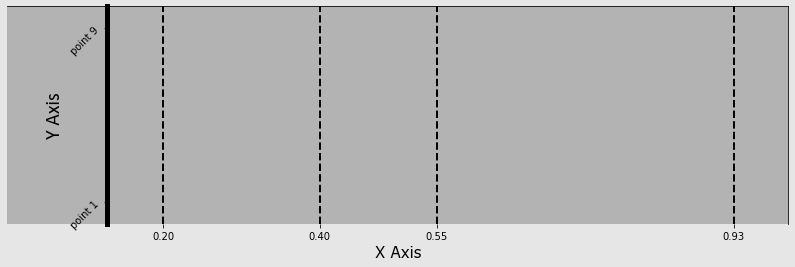

In [17]:
# 11.1.11 X축 axis 과 Y축 axis의 속성을 변경해본다.

# X축은 X축 객체를 호출하고, 그 속성을 직접 변경해 본다.  
ax.xaxis.grid(True, which='major', linewidth=2, color='black', linestyle='--')
ax.xaxis.set_ticks([.2, .4, .55, .93])
ax.xaxis.set_label_text('X Axis', family='Verdana', fontsize=15)

# Y축은 ax가 set_ 메소드로 직접 변경해본다. 
ax.set_ylabel('Y Axis', family='Calibri', fontsize=20)
ax.set_yticks([.1, .9])
ax.set_yticklabels(['point 1', 'point 9'], rotation=45)
fig

# >> How it works...

tuple

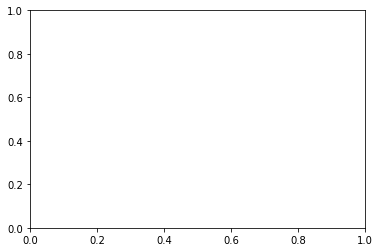

In [18]:
# plt.subplots은 (fig, ax) 의 tuple 반환값을 갖고 있다. 
plot_objects = plt.subplots(nrows = 1, ncols = 1)
type (plot_objects)

In [19]:
plot_objects

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2215d89c048>)

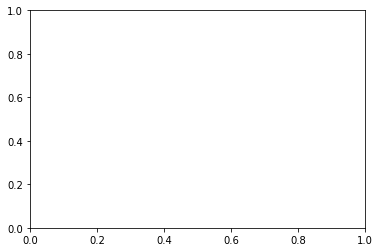

In [20]:
fig = plot_objects[0]
ax = plot_objects[1]
fig

In [21]:
ax

In [22]:
plot_objects[1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002215D8DF288>,
      dtype=object)

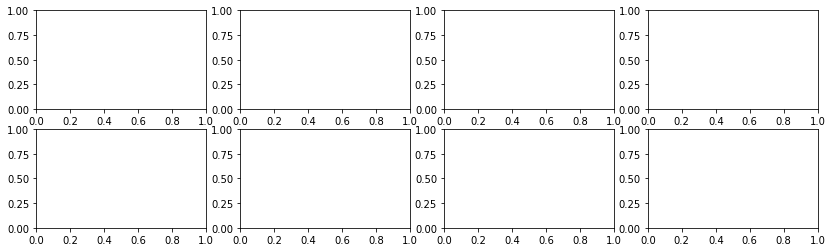

In [23]:
# 복수개의 차트를 생성하면, axes는 NumPy 배열이다. 
plot_objects = plt.subplots(nrows = 2, ncols = 4, figsize = (14,4))
plot_objects[1]

In [24]:
# getter 속성으로 호출되는 객체가 직접 .으로 호출하는 객체와 같은지 확인해보자.
fig.axes == fig.get_axes()

True

In [25]:
ax.xaxis == ax.get_xaxis()

True

In [26]:
ax.yaxis == ax.get_yaxis()

True

# >> There's more... 11.1

In [27]:
# X 축을 제어할 속성 properties
ax.xaxis.properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'children': [Text(0.5, 3.1999999999999993, ''),
  Text(1, 4.199999999999999, ''),
 'clip_box': <matplotlib.transforms.TransformedBbox at 0x2215da28b88>,
 'clip_on': True,
 'clip_path': None,
 'contains': None,
 'data_interval': array([ inf, -inf]),
 'figure': <Figure size 432x288 with 1 Axes>,
 'gid': None,
 'gridlines': <a list of 6 Line2D gridline objects>,
 'in_layout': True,
 'inverted': False,
 'label': Text(0.5, 3.1999999999999993, ''),
 'label_position': 'bottom',
 'label_text': '',
 'major_formatter': <matplotlib.ticker.ScalarFormatter at 0x2215d8ebf08>,
 'major_locator': <matplotlib.ticker.AutoLocator at 0x2215d8eb2c8>,
 'major_ticks': [<matplotlib.axis.XTick at 0x2215da1eb88>,
 'majorticklabels': <a list of 6 Text major ticklabel objects>,
 'majorticklines': <a list of 12 Line2D ticklines objects>,
 'majorticklocs': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 'minor_formatter': <matplotlib.ticker.NullFormatter at 0x2215d8b

# 11.2 Visualization with Matplotlib

In [28]:
### [Tech]  matplotlib 함수, 메소드를 이용해서 직접 시각화 해본다. (DataFrame은 데이터로만 사용)
###        데이터 추출 : .rolling 이용한 이동평균, top10 median, 5년 간격 데이터 추출
###        chart 축, grid, annotate, legend 등 
### [Goal] movie의 연도별 예산 추이를 다양한 시각화를 통해 검토해본다. 
###       - 연도별 영화 예산 , 데이터에 포함된 영화 개수 정보, 예산 Top10 영화의 비교 ,
###         - 임의의 영화 연도별 점수별 예산 크기 시각화

# >> How to do it...

In [29]:
# 11.2.1 movie 를 읽어들이고, 연도별 예산의 중위수를 구하고 Million 단위로 환산한다. 
movie = pd.read_csv('data/movie.csv')

med_budget = movie.groupby('title_year')['budget'].median() / 1e6   # 연간 평균 예산 (M$)
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()  # 5년 rolling 평균을 구한다
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64

In [30]:
# 11.2.2 구한 값을 NumPy Array로 저장 한다. 
years = med_budget_roll.index.values  # 연도 index.values
years[-5:]

array([2012., 2013., 2014., 2015., 2016.])

In [31]:
budget = med_budget_roll.values  # 값(예산) .values
budget[-5:]

array([20.893, 19.893, 19.1  , 17.98 , 17.78 ])

Text(0, 0.5, 'Millions of Dollars')

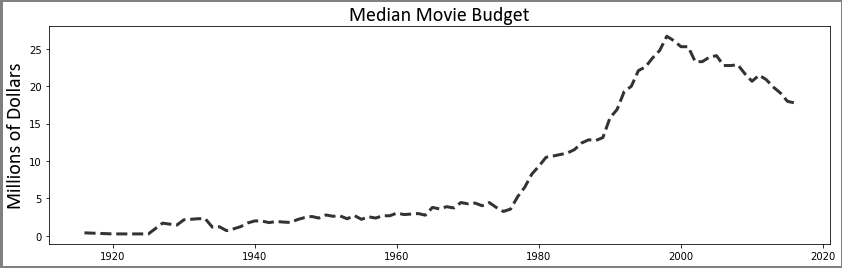

In [32]:
# 11.2.3 영화의 이동평균값을 그려본다. 

# fig, ax 의 설정 (크기, 선 굵기, 색상 등)
fig, ax = plt.subplots(figsize=(14,4), linewidth=5, edgecolor='.5')

# ax에 도식화 한다. x축 레이블에 years, y값 budget, 선 스타일, 굵기, 색상 및 
#  레젠드에 표기할 레이블 지정
ax.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')

#  차트 제목 및 Y 축 명 지정 
text_kwargs=dict(fontsize=20, family='Calibri')   # 폰트크기와 폰트명 설정
ax.set_title('Median Movie Budget', **text_kwargs)
ax.set_ylabel('Millions of Dollars', **text_kwargs)

In [33]:
# 11.2.4  영화 예산의 크기가 1990년대 말에 peak가 있고 감소된다. 
#      과거 데이터는 흥행작 위주여서 값이 클 수 있다. 영화 개수를 확인해보자.
movie_count = movie.groupby('title_year')['budget'].count()
movie_count.tail()

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64

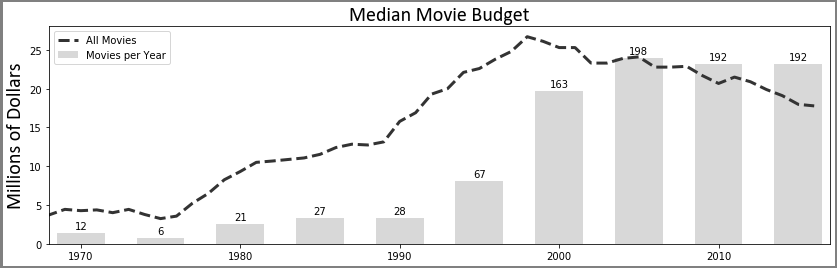

In [34]:
# 11.2.5 영화의 개수와 예산을 함께 표현해 볼 필요가 있다. 
#        매 5년차 단위로 영화 개수의 평균 수를 막대 그래프로 병행해보자. 

# 하나의 y축을 이용해서  영화 예산과 영화 개수를 표현하기 위해서 영화 개수를 예산의 단위로 
#  환산 변환 한다.  ( 물론 y 축을 2개 지정하는 방법도 있다...)
ct = movie_count.values
ct_norm = ct / ct.max() * budget.max()

# 1970년 이후 매 5차년에 대한 Boolean Index를 생성하고, 매 5년도를 갖는 배열
# year_5 를 생성한다.
fifth_year = (years % 5 == 0) & (years >= 1970)
years_5 = years[fifth_year]

# 영화 개수값도 매 5년차에 값을 구하여 ct_5에 저장하고, 
# 차트에 표현하기 위해 변환된 값을 ct_norm_5에 저장한다.  
ct_5 = ct[fifth_year]
ct_norm_5 = ct_norm[fifth_year]


# ax에 막대 그래프를 추가 한다. 매 5년마다, ct_norm_5 값을 출력하고 legend에 표기될 
# label명 'Movies per Year'도 지정한다. 
ax.bar(years_5, ct_norm_5, 3, facecolor='.5', alpha=.3, label='Movies per Year')
ax.set_xlim(1968, 2017)  # X축 범위 조정

# 막대 상자 위에 값 표현하기
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax.text(x, y + .5, str(v), ha='center')
ax.legend()

# 차트 출력
fig

In [35]:
# 11.2.6  연도별 상위 10개 예산의 중앙값으로 비교해보자.

# 연도별로 10개 영화의 중앙값을 구한다. 
top10 = movie.sort_values('budget', ascending=False) \
             .groupby('title_year')['budget'] \
             .apply(lambda x: x.iloc[:10].median() / 1e6)
        
# .rolling을 이용해서 5년 이동 평균을 구한다. 
top10_roll = top10.rolling(5, min_periods=1).mean()
top10_roll.tail()

title_year
2012.0    192.9
2013.0    195.9
2014.0    191.7
2015.0    186.8
2016.0    189.1
Name: budget, dtype: float64

C:\Users\Owner/Desktop/movie_budget.png


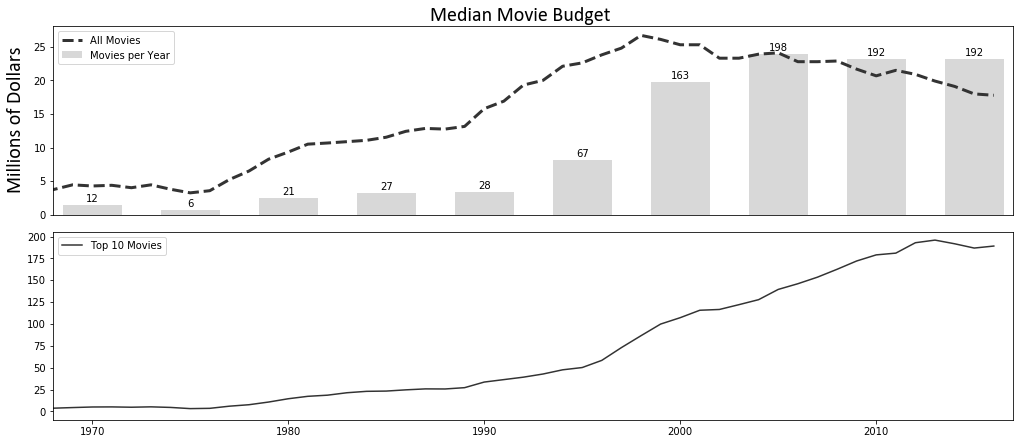

In [36]:
# 11.2.7  11.2.5의 그림 아래에 연도별 top10 예산의 중앙값 이동평균 값을 표현해보자.

# 세로로 2개의 차트를 그리기 위한 fig, ax를 마련한다. 
fig2, ax_array = plt.subplots(2, 1, figsize=(14,6), sharex=True) # 2row, shared X axis
ax1 = ax_array[0]  # upper ax
ax2 = ax_array[1]  # bottom ax

### ax1에 11.2.3~5의 내용을 반영한다. 

# 예산 꺾은선
ax1.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
# 매 5년차 마다의 영화 개수 
ax1.bar(years_5, ct_norm_5, 3, facecolor='.5', alpha=.3, label='Movies per Year')
ax1.legend(loc='upper left')  # legend 위치 지정
ax1.set_xlim(1968, 2017)      # X축 범위
# X 축의  레이블, 눈금을 보이지 않게 함
plt.setp(ax1.get_xticklines(), visible=False)
# 영화 개수 숫자 표기
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax1.text(x, y + .5, str(v), ha='center')

### ax2에 11.2.6에서 구한 연도별 top10 예산 중앙값의 이동평균을 그린다.
# top10_roll의 values로 y값을 전달하고 legend에 찍힐 레이블은 'Top 10 Movies'로 한다.     
ax2.plot(years, top10_roll.values, color='.2', label='Top 10 Movies')
ax2.legend(loc='upper left')

# 전체 그림 figure의 조정 
fig2.tight_layout() # 여백을 좁게
# 전체 도표 제목을 출력한다. y = 1.02는 약간 더 높은 곳에 표시한다. 
# ax의 좌하단 (0,0) , 우상단 (1,1)이다. 
fig2.suptitle('Median Movie Budget', y=1.02, **text_kwargs)  
fig2.text(0, .6, 'Millions of Dollars', rotation='vertical',\
          ha='center', **text_kwargs)  # Y축 값들의 비교
        

# 그린 도형을 이미지로 저장한다.     
import os
path = os.path.expanduser('~/Desktop/movie_budget.png')  # 절대 경로 생성 
print (path) 
fig2.savefig(path, bbox_inches='tight')   # 그림 저장 

# >> How it works...

In [37]:
# .rolling() 메소드는 Rolling 객체를 반환하는데, groupby 처럼 다른 함수와 결합하여
#  원하는 값을 구한다. 
med_budget.rolling(5, min_periods=1)

Rolling [window=5,min_periods=1,center=False,axis=0]

In [38]:
med_budget_roll = med_budget.rolling(5, min_periods=1).mean() 
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64

In [39]:
# med_budget_roll의 값이 정확하게 구해진 것인지 확인해보자.
med_budget.loc[2012:2016].mean()

17.78

In [40]:
med_budget.loc[2011:2015].mean()

17.98

In [41]:
med_budget.loc[2010:2014].mean()

19.1

In [42]:
# 11.2.7의 마지막 부분, 파일 저장시에 fig.savefig()는 절대 경로만 인식한다. 
# 이를 위해 os.path.expanduser를 이용해서 상대 경로의 현재위치 '~'을 절대경로로 변경한다. 
os.path.expanduser('~/Desktop/movie_budget.png')

'C:\\Users\\Owner/Desktop/movie_budget.png'

## >> There's more... 11.2

In [43]:
# matplotlib 1.5 이후부터는 pandas의 DataFrame을 data로 받을 수 있고, 컬럼명을 직접
# 활용할 수 있다. 

## 2000년 이후 제작된 임의의 100개 영화에 대해서 연도별 imdb_score 산포도를 그려본다.
##  이 때 각 점의 크기는 예산규모에 비례한다. 

In [44]:
# 필요한 컬럼만으로 구성된 DataFrame m을 생성한다.  
# 추출된 m의 NaN 값이 있으면 삭제한다. dropna의 매개변수 how의 기본값은 'any' 이다. 
cols = ['budget', 'title_year', 'imdb_score', 'movie_title'] # 예산, 연도, 점수, 제목
m = movie[cols].dropna()  

m['budget2'] = m['budget'] / 1e6    # Million 단위로 예산 조정한 budget2 생성

# 2000년도 이후 영화 중 임의의 100개 행 샘플링
np.random.seed(0)     # 같은 값 얻기 위해 seed 고정
movie_samp = m.query('title_year >= 2000').sample(100)
movie_samp.tail(3)

,budget,title_year,imdb_score,movie_title,budget2
2674,15000000.0,2008.0,6.2,The Rocker,15.0
241,115000000.0,2016.0,6.1,The Huntsman: Winter's War,115.0
480,80000000.0,2000.0,5.3,Little Nicky,80.0


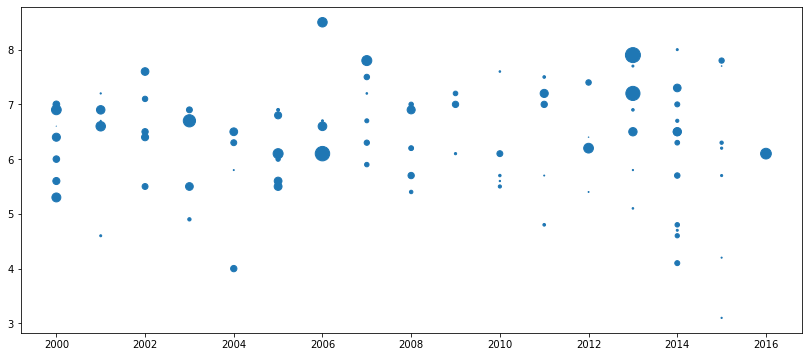

In [45]:
# ax 에 산포도를 그린다. seaborn 처럼 data에 DataFrame을 지정하면
# x, y, s 에 컬럼명으로 값 지정이 가능하다. 
# s 는 size 이다. 
fig, ax = plt.subplots(figsize=(14,6))
ax.scatter(x='title_year', y='imdb_score', s='budget2', data=movie_samp)

In [46]:
# 차트에 최고 점수와 최저 점수를 갖는 값에 점수와 영화 명을 포기 해보자.
idx_min = movie_samp['imdb_score'].idxmin()  # 최고 점수의 인덱스
idx_max = movie_samp['imdb_score'].idxmax()  # 최저 점수의 인덱스

# 최고, 최저 점수를 갖는 영화의 정보
movie_samp.loc[[idx_min, idx_max]]

,budget,title_year,imdb_score,movie_title,budget2
4348,1500000.0,2015.0,3.1,Checkmate,1.5
357,90000000.0,2006.0,8.5,The Departed,90.0


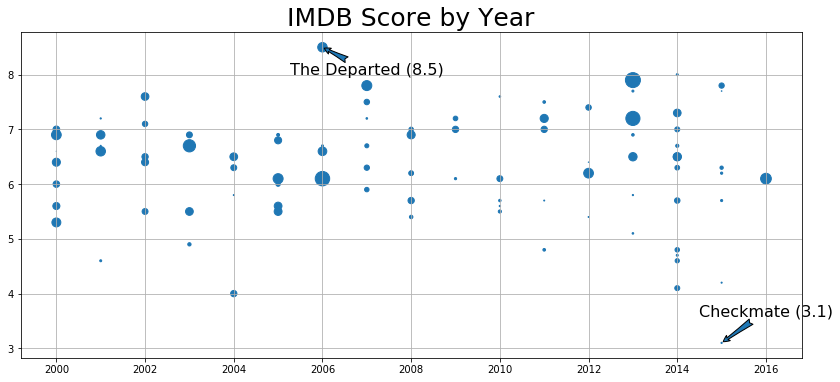

In [47]:
# 두 영화에 대해서 화살표와 텍스트값을 표시해 본다. 
for idx, offset in zip([idx_min, idx_max], [.5, -.5]):
    year = movie_samp.loc[idx, 'title_year']
    score = movie_samp.loc[idx, 'imdb_score']
    title = movie_samp.loc[idx, 'movie_title']
    # 화살표와 각주
    ax.annotate(xy=(year, score),                       #  화살표 끝 점 x, y 좌표
                xytext=(year + 1, score + offset),      #  문자열 표시 위치
                s=title + ' ({})'.format(score),        #  s 는 표시할 문자열
                ha='center',                            #  horizontal align = 중앙
                size=16,                                #  폰트 크기
                arrowprops=dict(arrowstyle="fancy"))    #  화살표 특성
    
# 영화 제목 표시    
ax.set_title('IMDB Score by Year', size=25)
# 격자 표시
ax.grid(True)

# 차트 출력
fig

# 11.3 Plotting basics with pandas

In [48]:
### [Tech] df.plot (,, ax= ax) , DataFrame에서 plot을 호출하고, 그 안에 ax 매개변수에 
###        ax 객체를 넘김으로서 출력 위치를 지정한다. 
### [Goal] pandas의 메소드로 제공되는 plot은 기능은 제한적이지만, 간단하게 개괄을 확인 할 때, 
###     사용 된다. 1변량 일 때는 데이터의 분포(히스토그램 , boxplot, kde등)으로 사용하고
###     2변량일때는 인덱스가 x축 컬럼의 값이 y축으로 사용 된다. 

# >> How to do it...

In [49]:
# 11.3.1 인덱스가 label로 지정된 DataFrame을 생성한다. 
df = pd.DataFrame(index=['Atiya', 'Abbas', 'Cornelia', 'Stephanie', 'Monte'], 
                  data={'Apples':[20, 10, 40, 20, 50],
                        'Oranges':[35, 40, 25, 19, 33]})
df

,Apples,Oranges
Atiya,20,35
Abbas,10,40
Cornelia,40,25
Stephanie,20,19
Monte,50,33


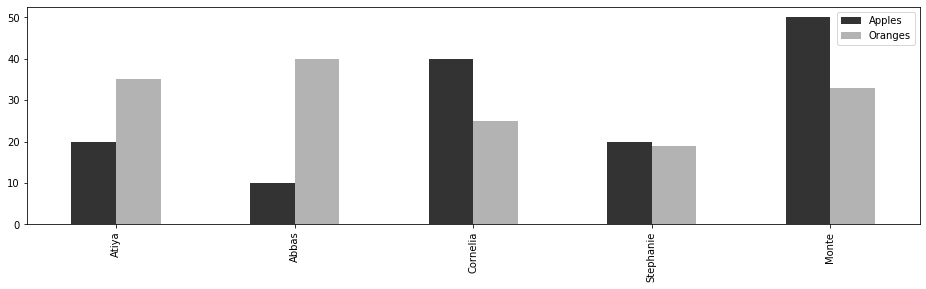

In [50]:
## 11.3.2 막대 그래프 : 인덱스가 X축, Apples, Oranges의 값이 Y 축이다. 
color = ['.2', '.7']
df.plot(kind='bar', color=color, figsize=(16,4))

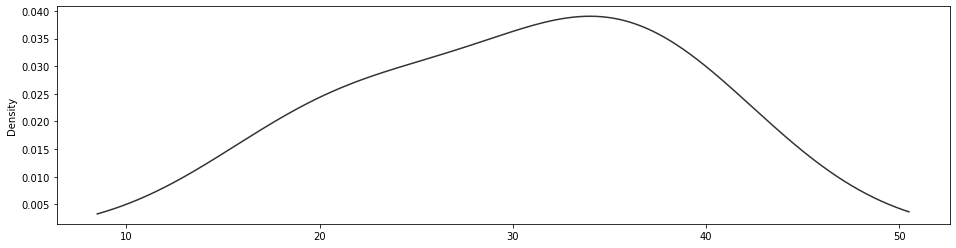

In [51]:
## 11.3.3 1변량, Orange 컬럼에 대해서 kde kernel density estimation그래프를 그린다. 
df['Oranges'].plot(kind='kde', color=color, figsize=(16,4));

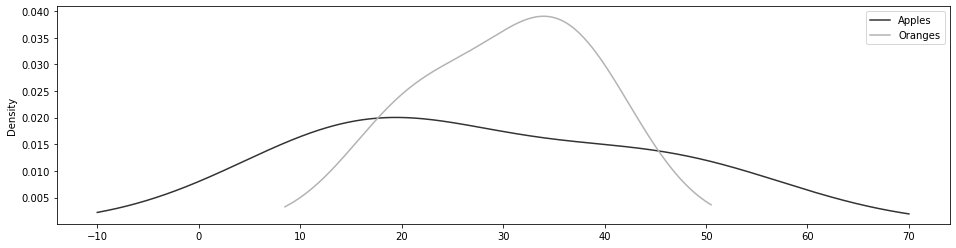

In [52]:
df.plot(kind='kde', color=color, figsize=(16,4))

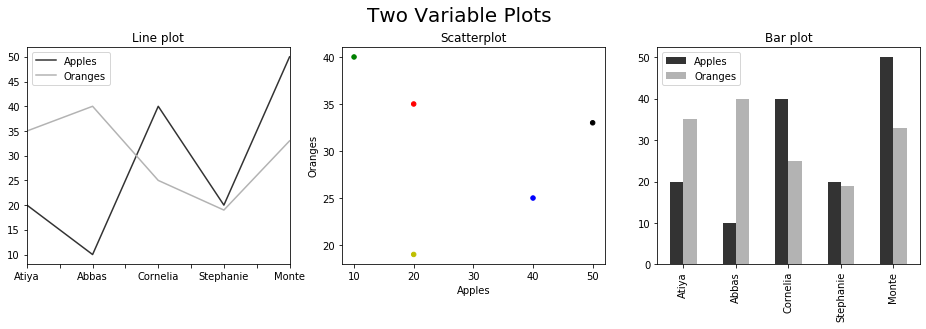

In [53]:
# 11.3.4 2변량 꺽은선, 산포도, 막대그래프를 하나의 figure에 그려본다.  
# figure 와 axes를 생성한다. 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
# figure 전체의 제목
fig.suptitle('Two Variable Plots', size=20, y=1.02)
# ax1 : 꺽은선 (x - 인덱스, y- Apples,Oranges) 
df.plot(kind='line', color=color, ax=ax1, title='Line plot')
# ax2 : 산포도 (x - Apples, y - Oranges)
df.plot(x='Apples', y='Oranges', kind='scatter', color=list('rgbyk'), 
        ax=ax2, title='Scatterplot')
# ax3 : 막대그래프  (x - 인덱스, y- Apples,Oranges) 
df.plot(kind='bar', color=color, ax=ax3, title='Bar plot')

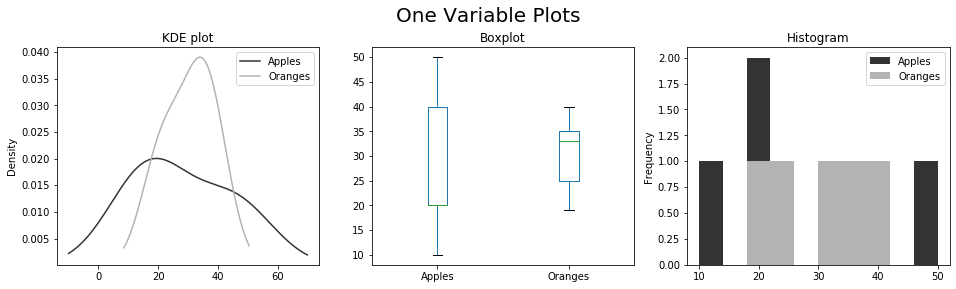

In [54]:
# 11.3.5 2변량 kde, boxplot, histogram 을  하나의 figure에 그려본다.  
# figure 와 axes를 생성한다. 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
# figure 전체의 제목
fig.suptitle('One Variable Plots', size=20, y=1.02)
# ax1 : kde ( y- Apples,Oranges) 
df.plot(kind='kde', color=color, ax=ax1, title='KDE plot')
# ax2 : boxplot ( y- Apples,Oranges) 
df.plot(kind='box', ax=ax2, title='Boxplot')
# ax3 : histogram ( y- Apples,Oranges)
df.plot(kind='hist', color=color, ax=ax3, title='Histogram')

# >> There's more...11.3

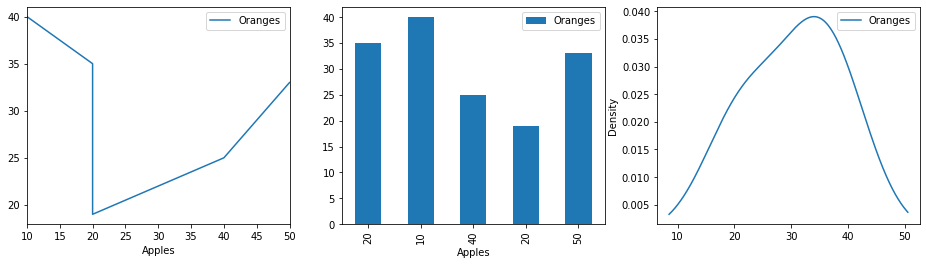

In [55]:
# 2변량 변수 chart에서 X축에 컬럼을 사용하고 싶으면, x, y를 명시적으로 지정하면된다. 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
# ax1 : 꺽은선 (x - Apples, y- Oranges) 
df.sort_values('Apples').plot(x='Apples', y='Oranges', kind='line', ax=ax1)
# ax2 : 막대그래프  ( x- Apples, y-Oranges) 
df.plot(x='Apples', y='Oranges', kind='bar', ax=ax2)
# ax3 : kde ( x-Apples, y- Oranges) 
df.plot(x='Apples', kind='kde', ax=ax3)

# 11.4 Visualizing the flights dataset

In [56]:
### [Tech] plot, resample, transform, indexing 등 필요한 기능을 사용한다. 
### [Goal] flight  univariate 의 분포 시각화하여 이해한다. 
###    주별 운항 편수에 이상치가 있는데, 보간법으로 처리 한다. 
###   운행거리 대비 운행시간의 분포를 살펴보고 이상치를 표기 한다. 

# >> How to do it...

In [57]:
# 11.4.1  flight 를 load 한다. 
flights = pd.read_csv('data/flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [58]:
# 11.4.2 항공사별 지연, 우회, 취소, 정시 비행 편수를 계산한다. 
# 예정보다 15분 이상 늦으면 지연으로 분류한다. 

flights['DELAYED'] = flights['ARR_DELAY'].ge(15).astype(int)  # 15분 이상 지연
cols = ['DIVERTED', 'CANCELLED', 'DELAYED']   # 우회, 취소, 지연
flights['ON_TIME'] = 1 - flights[cols].any(axis=1)  # 정상운행은 cols 가 모두 0일때 1

cols.append('ON_TIME')  # cols에 'ON_TIME' 추가
status = flights[cols].sum()  # 각 컬럼별 합계를 status에 저장한다. 
status

DIVERTED       137
CANCELLED      881
DELAYED      11685
ON_TIME      45789
dtype: int64

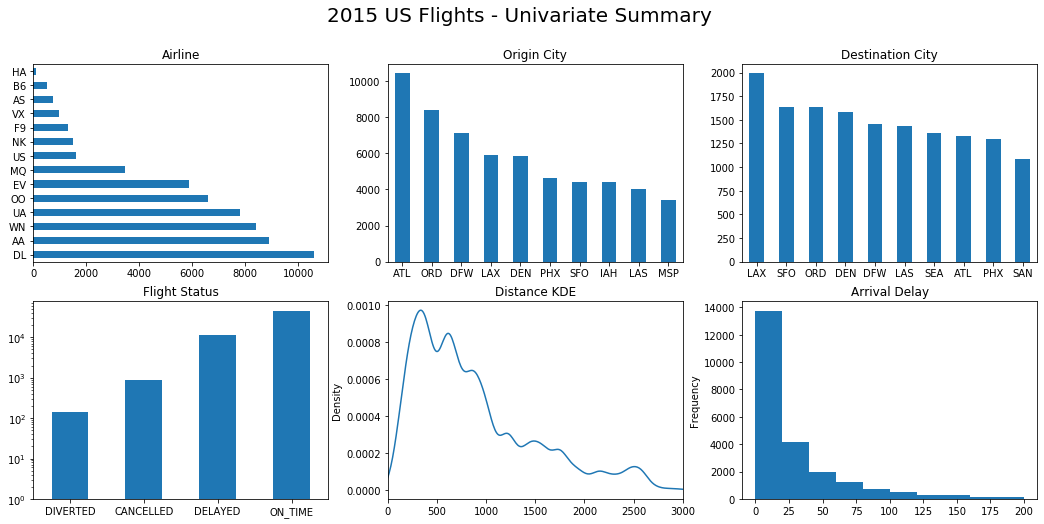

In [59]:
# 11.4.3 각 변수별 특성을 파악할 수 있는 변수(컬럼)별 그래프를 그린다. 

# 2 row 3 column 으로 도식화하기 위해 fig, ax 설정
fig, ax_array = plt.subplots(2, 3, figsize=(18,8))
(ax1, ax2, ax3), (ax4, ax5, ax6) = ax_array
fig.suptitle('2015 US Flights - Univariate Summary', size=20)  #전체 fig 제목

# ax1 : 항공사별 항공편 수(ac)를 수평 막대 그래프로 표시
ac = flights['AIRLINE'].value_counts()
ac.plot(kind='barh', ax=ax1, title ='Airline')

# ax2 : 출발 공항별 항공편 수(oc)를 막대 그래프로 표시
oc = flights['ORG_AIR'].value_counts()
oc.plot(kind='bar', ax=ax2, rot=0, title='Origin City')

# ax3 : 도착 공항별 항공편 수(dc)를 막대그래프로 표시
dc = flights['DEST_AIR'].value_counts().head(10)
dc.plot(kind='bar', ax=ax3, rot=0, title='Destination City')

# ax4 : 운행결과에 대한 막대 그래프 표시, 척도간 수치 차이가 커서 log 척도를 사용한다. 
status.plot(kind='bar', ax=ax4, rot=0, log=True, title='Flight Status')

# ax5 : 운항거리 분포를 kde 그래프로 표현한다. (범위는 0~3000)
flights['DIST'].plot(kind='kde', ax=ax5, xlim=(0, 3000),
                     title='Distance KDE')

# ax6 : 도착 지연의 분포는 히스토 그램으로 표현한다. (범위는 0~200)
flights['ARR_DELAY'].plot(kind='hist', ax=ax6, 
                          title='Arrival Delay', range=(0,200))

In [60]:
# 11.4.4 주별 weekly 통계량을 구하기 위해, 시간 컬럼을 생성한다. 
#  일단 필요한 연, 월, 일, 시, 분 컬럼을 구성해보자.
hour = flights['SCHED_DEP'] // 100   # 시
minute = flights['SCHED_DEP'] % 100  # 분
# 월, 일 컬럼을 추출하고, 연, 시, 분을 .assign 메소드를 통해 컬럼에 추가 한다. 
df_date = flights[['MONTH', 'DAY']].assign(YEAR=2015, HOUR=hour, MINUTE=minute) 
df_date.head()

,MONTH,DAY,YEAR,HOUR,MINUTE
0,1,1,2015,16,25
1,1,1,2015,8,23
2,1,1,2015,13,5
3,1,1,2015,15,55
4,1,1,2015,17,20


In [61]:
# 11.4.5  df_date 를 이용해서 출발 시간을 Timestamp로 변환, flight_dep에 저장한다. 
flight_dep = pd.to_datetime(df_date)
flight_dep.head()

0   2015-01-01 16:25:00
1   2015-01-01 08:23:00
2   2015-01-01 13:05:00
3   2015-01-01 15:55:00
4   2015-01-01 17:20:00
dtype: datetime64[ns]

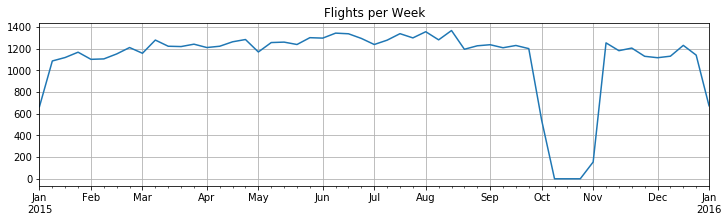

In [62]:
# 11.4.6 주별 항공편수(fc)를 꺽은선 그래프로 표현한다.
flights.index = flight_dep  # Timestamp 화 한 출발 시각을 인덱스로 한다. 
fc = flights.resample('W').size()   # 주단위로 resample
fc.plot(figsize=(12,3), title='Flights per Week', grid=True) # 차트 표시

In [63]:
# 11.4.7 10월의 데이터는 이상하다. 10월 데이터 전체가 값이 없고 (= 0건)
#       1월 첫주와 12월 마지막주 데이터는 값의 크기가 어정쩡한데, 
#       7일 데이터가 확보되지 못한 것으로 예상된다. 
#      주별로 1000건 이하의  전체를 모두 누락값으로 만든 다음 보간 법으로 값을 생성한다. 
fc_miss = fc.where(fc >  1000)    # fc > 1000이면 원래값, 그 외는 NaN 반환 
fc_intp = fc_miss.interpolate(limit_direction='both')  # NaN에 대해서 보간법으로 값 생성

fc_miss.head()

2015-01-04       NaN
2015-01-11    1088.0
2015-01-18    1120.0
2015-01-25    1169.0
2015-02-01    1103.0
Freq: W-SUN, dtype: float64

In [64]:
fc_intp.head()

2015-01-04    1088.0
2015-01-11    1088.0
2015-01-18    1120.0
2015-01-25    1169.0
2015-02-01    1103.0
Freq: W-SUN, dtype: float64

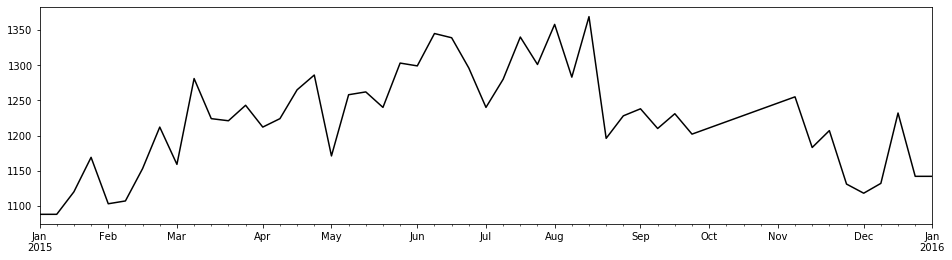

In [65]:
# Series fc_intp.plot()으로 그래프를 다시 그린다. 
# y축 범위가 1000 이상부터 시작되어 굴곡이 두드러지게 되었다. 
# 추후 필요한 항목을 보완하기 위해 return 된 ax를 변수 할당한다. 
ax = fc_intp.plot(color='black', figsize=(16,4))

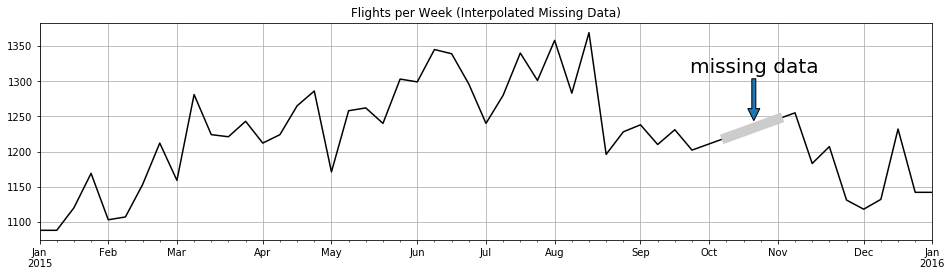

In [66]:
# 보간법을 적용 한 위치에 표식을 남기려고 한다. 
fc_intp[fc < 500].plot(linewidth=10, grid=True, # 10월 주당 500건 이하 구간을 boolean filter
                       color='.8', ax=ax)       # 회색 두꺼운 색으로 그린다. grid = True

# 화살표 추가 한다. 
ax.annotate(xy=(.8, .55), xytext=(.8, .77),          # ax 좌표계에서 화살 끝점 지정
            xycoords='axes fraction', s='missing data',   # 좌표계 및 출력 문자열
            ha='center',  size=20, arrowprops=dict())    # 문자 align, 폰트크기, 화살특성
ax.set_title('Flights per Week (Interpolated Missing Data)') # ax title

# chart 출력
ax.get_figure()

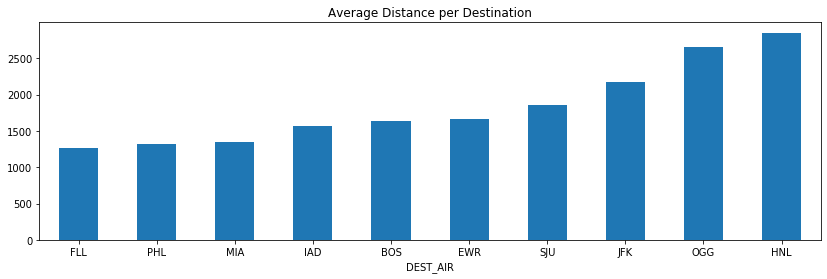

In [67]:
# 11.4.8 복수개의 컬럼을 이용해 조건 충족한 부분집합의 분포를 살펴보자. 

# 도착 공항별 비행거리 평균과 건수 합계를 구한다. 
# 최소 운영건수가 100건 이상인 공항에 대해서 운항거리 평균을 구하고, 
# 그 값이 가장 큰 항공사 10개를 구해서 막대 그래프로 표현한다. 

flights.groupby('DEST_AIR')['DIST'] \
       .agg(['mean', 'count']) \
       .query('count > 100') \
       .sort_values('mean') \
       .tail(10) \
       .plot(kind='bar', y='mean', legend=False, 
             rot=0, figsize=(14,4),
             title='Average Distance per Destination')
# 가장 장거리가 되는 공학은 하와이에 있다. (OGG, HNL)

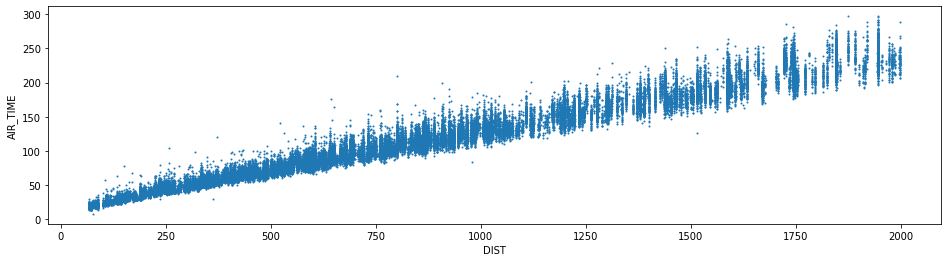

In [68]:
# 11.4.9 2000마일 이하의 항공편을 거리와 비행시간의 산포도를 그려보자 .
# fs에 비행거리 2000마일 이하의 거리와 비행시간을 갖는 DataFrame fs를 생성한다.  
fs = flights.reset_index(drop=True)[['DIST', 'AIR_TIME']].query('DIST <= 2000').dropna()
fs.plot(x='DIST', y='AIR_TIME', kind='scatter', s=1, figsize=(16,4))
# 거리가 길어질수록 편차가 커지지만, 대체로 상관 관계가 나타난다. 
# 몇 몇 이상치 outlier가 감지되는데, 이를 시각화 해보자. 

In [69]:
# 11.4.10 pandas에서는 회귀식을 직접 지원하지 않으므로 
#  운행 거리별 (250마일)로 구간을 나누고 구간별 평균과 편차를 이용해서 z-score로 
#  이상치를 판별해 보자 

# 250마일 단위로 그루핑 하기 위해서 pd.cut() 호출하고, 'DIST_GROUP' 컬럼 생성한다. 
fs['DIST_GROUP'] = pd.cut(fs['DIST'], bins=range(0, 2001, 250))

# 구간변 데이터 건수 구한 되 다시 인덱스 정렬로 보기 좋게 정리 한다.  
#  (굳이 groupby를 사용하지 않음)
fs['DIST_GROUP'].value_counts().sort_index()

(0, 250]         6529
(250, 500]      12631
(500, 750]      11506
(750, 1000]      8832
(1000, 1250]     5071
(1250, 1500]     3198
(1500, 1750]     3885
(1750, 2000]     1815
Name: DIST_GROUP, dtype: int64

In [70]:
# 11.4.11 비행시간을 구간별로 정규화하여 변환하고 fs의 'TIME_SCORE' 컬럼으로 저장한다. 
normalize = lambda x: (x - x.mean()) / x.std()
fs['TIME_SCORE'] = fs.groupby('DIST_GROUP')['AIR_TIME'] \
                     .transform(normalize)

fs.head()

,DIST,AIR_TIME,DIST_GROUP,TIME_SCORE
0,590,94.0,"(500, 750]",0.490966
1,1452,154.0,"(1250, 1500]",-1.267551
2,641,85.0,"(500, 750]",-0.296749
3,1192,126.0,"(1000, 1250]",-1.211020
4,1363,166.0,"(1250, 1500]",-0.521999


Text(0.5, 0.98, '')

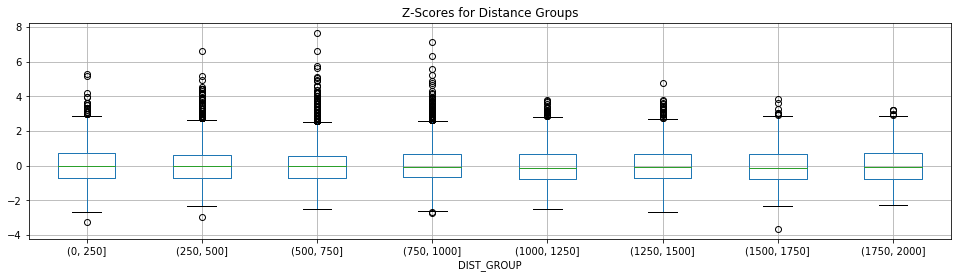

In [71]:
# 11.4.12 항공 구간별로  표준화 한 TIME_SCORE를 도식화 하여 6 sigma 이상의 
#  이상치 outlier를 확인 할 수 있다. 
ax = fs.boxplot(by='DIST_GROUP', column='TIME_SCORE', figsize=(16,4))
ax.set_title('Z-Scores for Distance Groups')
ax.figure.suptitle('')

In [72]:
fs.head()
#flights.head()

,DIST,AIR_TIME,DIST_GROUP,TIME_SCORE
0,590,94.0,"(500, 750]",0.490966
1,1452,154.0,"(1250, 1500]",-1.267551
2,641,85.0,"(500, 750]",-0.296749
3,1192,126.0,"(1000, 1250]",-1.211020
4,1363,166.0,"(1250, 1500]",-0.521999


In [73]:
# 11.4.13 이상치가 있는 행을 추출해보자

# 우선 fs는 filghts를 reindex 한 상태에서 query, drop을 수행해서 
#   fs의 인덱스 레이블과  flights의 iloc 기준 인덱스가 같다. (11.4.9 확인)
#   TIME_SCORE > 6인 값을 추출하고 그 인덱스를 flight.iloc로 전달하면 
#   flight에서 항공 정보를 추출 할 수 있다.  이 DataFrame을 outliers에 g할당한다. 
outliers = flights.iloc[fs[fs['TIME_SCORE'] > 6].index]  
# 필요한 컬럼으로  정리
outliers = outliers[['AIRLINE','ORG_AIR', 'DEST_AIR', 'AIR_TIME', 
                     'DIST', 'ARR_DELAY', 'DIVERTED']]  
# 이상치 항공편 번호 컬럼 추가
outliers['PLOT_NUM'] = range(1, len(outliers) + 1)  
outliers # outlier 5개 확인

,AIRLINE,ORG_AIR,DEST_AIR,AIR_TIME,DIST,ARR_DELAY,DIVERTED,PLOT_NUM
2015-04-08 09:40:00,DL,ATL,CVG,121.0,373,54.0,0,1
2015-05-25 16:30:00,F9,MSP,ATL,199.0,907,79.0,0,2
2015-09-10 20:00:00,UA,IAH,MCI,176.0,643,76.0,0,3
2015-12-10 19:53:00,OO,PHX,SFO,164.0,651,146.0,0,4
2015-12-26 09:15:00,NK,ORD,DFW,210.0,802,98.0,0,5


Text(0.5, 1.0, 'Flight Time vs Distance with Outliers')

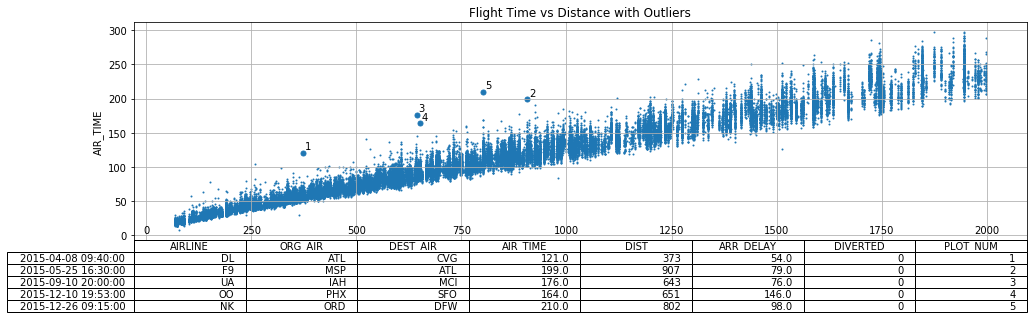

In [74]:
# 11.4.14 다시 이상치 정보를 포함해서 운항거리 vs 비행시간를 표현해보자.
# 11.4.9의 산포도를 그린다.  table = outliers 를 통해, 하단의 테이블 정보를 추가 한다. 
ax = fs.plot(x='DIST', y='AIR_TIME', 
             kind='scatter', s=1, 
             figsize=(16,4), table=outliers)

# 동일한 ax에 outlier 를 표기 한다. 점의 크기를 25로 강조하고, grid를 추가한다. 
outliers.plot(x='DIST', y='AIR_TIME',
              kind='scatter', s=25, ax=ax, grid=True)

# 각 outlier 번호 표식을 위해, X축 DIST, Y 축 AIR_TIME 과 출력할 PLOT_NUM을 추출한다.
outs = outliers[['AIR_TIME', 'DIST', 'PLOT_NUM']]
for t, d, n  in outs.itertuples(index=False): # tuple 형태로 컬럼 값을 추출
    ax.text(d + 5, t + 5, str(n))
    
# X축 설정
plt.setp(ax.get_xticklabels(), y=.1)  # x축 레이블 위치 조정
plt.setp(ax.get_xticklines(), visible=False) # x축 눈금 표시하지 않음
ax.set_xlabel('')

# 차트 제목
ax.set_title('Flight Time vs Distance with Outliers')

# 11.5 Stacking area charts to discover emerging trends

In [75]:
### [Tech] 카테고리형 컬럼항목과 날자시간 컬럼을 이용해서 누적 비중 영역 차트를 작성한다.
###         가입일자를 인덱스로 하는 데이터셋에서 회원수 정보를 추출하기 위해
###         .cumsum()을 활용한다. 
### [Goal] meetup 데이터에서 모임 유형 별 시계열 누적  비중 영역차트를 작성한다. 
###       meetup 데이터는 회원들의 가입일자를 갖고 있으며, 모임유형group, 도시, 주, 국각 항목을
###      갖는다. 

# >> How to do it...

In [76]:
# 11.5.1 meetup_group.csv로 부터 meetup 으로 load 한다. 'join_date'를 날자로 간주하고
#       인덱스로 지정한다. 
meetup = pd.read_csv('data/meetup_groups.csv', 
                     parse_dates=['join_date'], 
                     index_col='join_date')
meetup.head()

,group,city,state,country
join_date,,,,
2016-11-18 02:41:29,houston machine learning,Houston,TX,us
2017-05-09 14:16:37,houston machine learning,Houston,TX,us
2016-12-30 02:34:16,houston machine learning,Houston,TX,us
2016-07-18 00:48:17,houston machine learning,Houston,TX,us
2017-05-25 12:58:16,houston machine learning,Houston,TX,us


In [77]:
meetup.dtypes

group      object
city       object
state      object
country    object
dtype: object

In [78]:
# 11.5.2 주별 weekly, 모임유형 별 group 데이터 건수를 세어 Sereis group_count를 생성한다. 
group_count = meetup.groupby([pd.Grouper(freq='W'), 'group']).size()
group_count.head()

join_date   group   
2010-11-07  houstonr     5
2010-11-14  houstonr    11
2010-11-21  houstonr     2
2010-12-05  houstonr     1
2011-01-16  houstonr     2
dtype: int64

In [79]:
# 11.5.3 group_count를  모임 group으로 unstack하여 분할표 형태 DataFrame gc2 로 저장한다. 
gc2 = group_count.unstack('group', fill_value=0)
gc2.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,16,2,6,5,0
2017-09-24,19,4,16,12,7
2017-10-01,20,6,6,20,1
2017-10-08,22,10,10,4,2
2017-10-15,14,13,9,11,2


In [80]:
# 11.5.4각 모임별 현재 회원수를 구하기 위해 컬럼별로 누적 합 .cumsum()을 적용한다.
#       group_total에 할당한다. 
group_total = gc2.cumsum()
group_total.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,2105,1708,1886,708,1056
2017-09-24,2124,1712,1902,720,1063
2017-10-01,2144,1718,1908,740,1064
2017-10-08,2166,1728,1918,744,1066
2017-10-15,2180,1741,1927,755,1068


In [81]:
# 11.5.5 각 행별로 해당 주에 차지하는 비중 (행별로 컬럼의 비중)을 구하기 위해 
#        각 행을 합산하고, 합산 값으로 나눈다. 
row_total = group_total.sum(axis='columns')   # 행별 컬럼방향 합산  
group_cum_pct = group_total.div(row_total, axis='index') # 행별 합산 값으로 나누어 비중 구함
group_cum_pct.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,0.282058,0.228862,0.252713,0.094868,0.141498
2017-09-24,0.282409,0.227629,0.252892,0.095732,0.141338
2017-10-01,0.283074,0.226829,0.251914,0.097703,0.140481
2017-10-08,0.284177,0.226712,0.251640,0.097612,0.139858
2017-10-15,0.284187,0.226959,0.251206,0.098423,0.139226


Text(0.86, 0.78, 'Machine Learning')

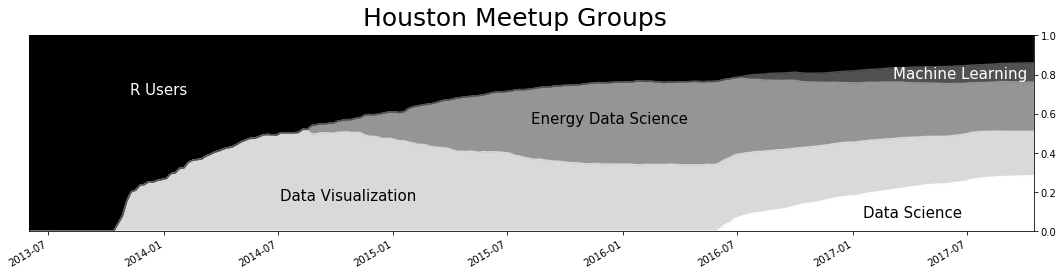

In [82]:
# 11.5.6 누적된 비중의 영역 차트로 표현한다.

# 누적 비중으로 정리된 group_cum_pct로 부터 kind= 'area'로 지정하여 영역 차트를 그린다.
# 추가 수정을 위해 .plot에서 반환한 axe는 ax에 할당한다. 
ax = group_cum_pct.plot(kind='area', figsize=(18,4),
                        cmap='Greys', xlim=('2013-6', None), 
                        ylim=(0, 1), legend=False)

# 차트에 필요한 정보를 추가 한다. 
ax.figure.suptitle('Houston Meetup Groups', size=25)  # 차트 제목
ax.set_xlabel('')   # x 축제목 없앰
ax.yaxis.tick_right()  # y 눈금을 오른쪽으로 이동

# 차트내 영역내에 legend 를 annotate를 이용하여 표시
plot_kwargs = dict(xycoords='axes fraction', size=15) 
ax.annotate(xy=(.1, .7), s='R Users', color='w', **plot_kwargs)
ax.annotate(xy=(.25, .16), s='Data Visualization', color='k', **plot_kwargs)
ax.annotate(xy=(.5, .55), s='Energy Data Science', color='k', **plot_kwargs)
ax.annotate(xy=(.83, .07), s='Data Science', color='k', **plot_kwargs)
ax.annotate(xy=(.86, .78), s='Machine Learning', color='w', **plot_kwargs)

# >> There's more...11.5

In [83]:
# 같은 데이터의 또 다른 시각화 방식으로 매 3개월마다 회원 비율을 snapshot으로 파이차트로 
# 표현할 수 있다. 


In [84]:
# goup_cum_pct에서 매 3개월 분기초 데이터를 추출하고  누락된 값은 bfill로 채운다.
# 마지막 6개월 데이터에 대해서 to_period('M')으로 월단위 기간으로 단위를 정리한 다음
# 월period가 컬럼이 될 수 있도록 전치transpose한 DataFrame pie_data를 생성한다. 

pie_data = group_cum_pct.asfreq('3MS', method='bfill') \
                        .tail(6).to_period('M').T
pie_data

join_date,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09
group,,,,,,
houston data science,0.016949,0.110375,0.171245,0.212289,0.244033,0.280162
houston data visualization,0.337827,0.306052,0.277244,0.261103,0.242085,0.230332
houston energy data science,0.416025,0.354467,0.312271,0.288859,0.267576,0.253758
houston machine learning,0.000000,0.037176,0.051969,0.071593,0.087839,0.093026
houstonr,0.229199,0.191931,0.187271,0.166156,0.158467,0.142722


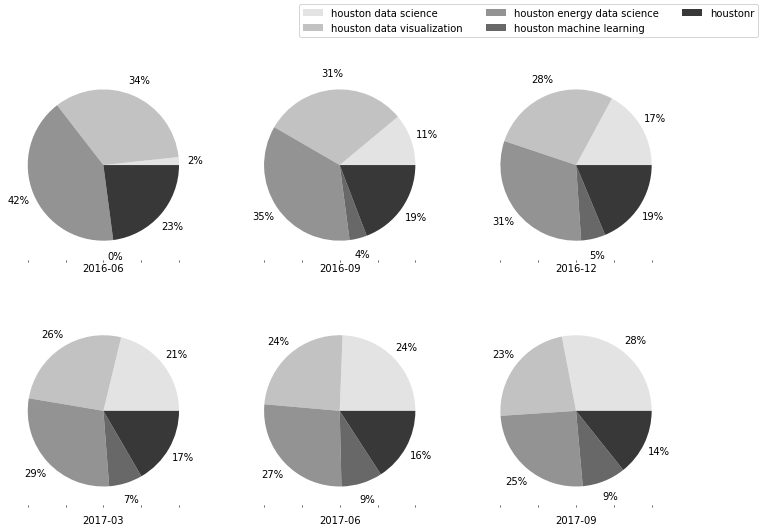

In [85]:
# DataFrame에서 pie chart로 표기한다. 

# 표현할 색상의 지정
from matplotlib.cm import Greys 
greys = Greys(np.arange(50,250,40))  #회색을 수치로 조정하여 색상 팔레트 생성

# DataFrame에서 파이차트를 그린다. 6개 파이차트의 axe 배열을 ax_array에 저장한다. 
ax_array = pie_data.plot(kind='pie',
                         subplots=True ,      # 특정 컬럼이 아니라 전체 컬럼을 각 파이차트로 
                         layout=(2,3),        # 2행 3열로 배치
                         labels=None,         # 각 슬라이스의 항목 값명을 출력하지 않음 
                         legend = False,      # 파이 차트별 범례legend는 보이지 않음 
                         autopct='%1.0f%%',   # 비중 % 의 표기 형식 (소수점이하 반올림)
                         pctdistance=1.22,    # 비중%  표시 위치
                         colors=greys,        # 색상 = 사용자 정의 회색 팔레트 
                         figsize = (12,8)     # 차트 크기 지정
                         )

# 첫번째 pie chart의 axe를 이용해서, figure에 legend를 생성한다. 
ax1 = ax_array[0, 0]
ax1.figure.legend(                # figure에서 범례 출력 (하나만 그리게 됨)
                  ax1.patches,    # ax1의 색상표 활용
                  pie_data.index, # 값은 DataFrame의 index 활용 
                  ncol=3)         # 표시 위치는 3번째 컬럼에 맞춤


# 각 파이차트에 대해서  연원-분기 정보에 해당하는 컬럼명을 출력하고 
for ax in ax_array.flatten():
    ax.xaxis.label.set_visible(True)  # x 축제목이 보이도록 설정
    ax.set_xlabel(ax.get_ylabel())    # x 축제목에 y축 레이블 -연월 분기 (컬럼명) 저장
    ax.set_ylabel('')                 # y 축 레이블을 공백으로 하여 y축제목 숨김

# 차트간의 간격을 .3으로  조정한다    
ax1.figure.subplots_adjust(hspace=.3)

# 11.6 Understanding the differences between seaborn and pandas

In [86]:
### [Tech] seaborn chart를 활용해본다. Tidy data를 적용하기에 유리하다. 
### [Goal] employee data를 이용해서 각 종 값 출력을 seaborn과 pandas api로 수행해 본다.

# >> How to do it...

In [87]:
# 11.6.1 employee를 읽어들인다, 인덱스는 지정하지 않고, HIRE_DATE, JOB_DATE는 datetime으로 
# 읽어 들인다. 
employee = pd.read_csv('data/employee.csv', 
                       parse_dates=['HIRE_DATE', 'JOB_DATE'])
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [88]:
# 11.6.2 Seaborn 라이브러리를 읽어들인다. 
import seaborn as sns
sns.set()

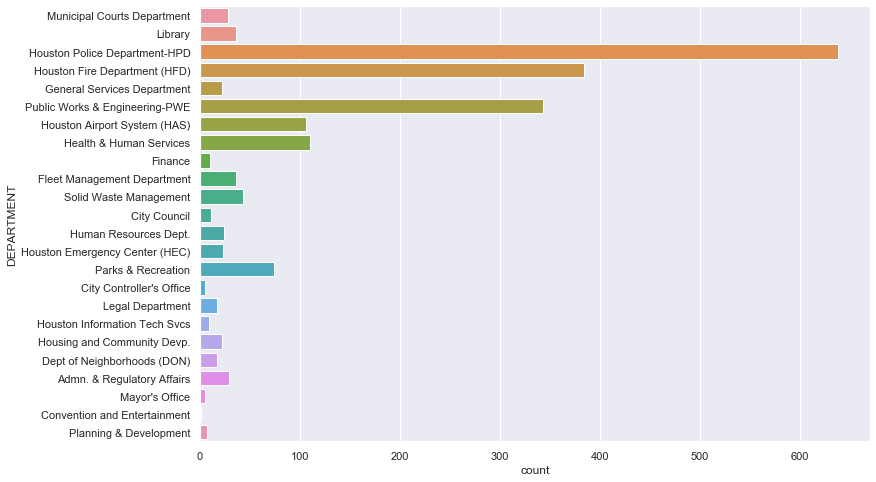

In [89]:
# 11.6.3 부서별 건수를 seaborn의 counterplot() 함수로 그려 본다
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(y='DEPARTMENT', data=employee , ax = ax)  # y축 컬럼과, DataFrame을 지정

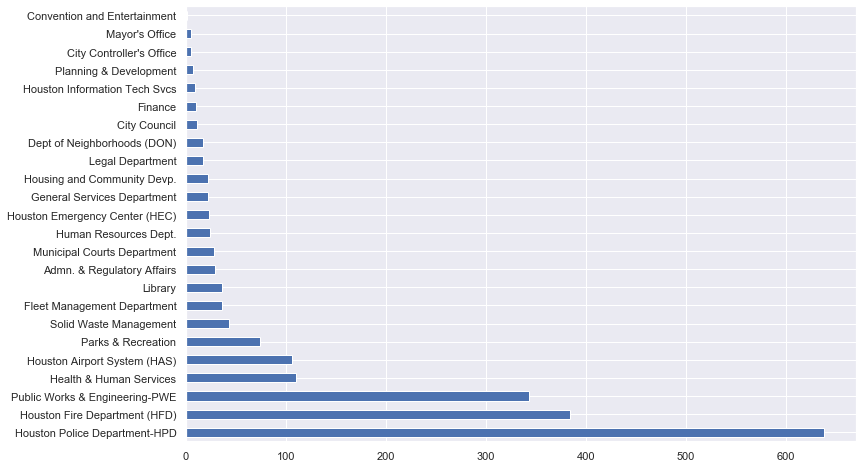

In [90]:
# 11.6.4 같은 그림을 DataFrame에서 직접 그릴려면, 집계를 먼저 수행해야 한다. (value_counts())
employee['DEPARTMENT'].value_counts().plot(kind='barh',figsize = (12,8))

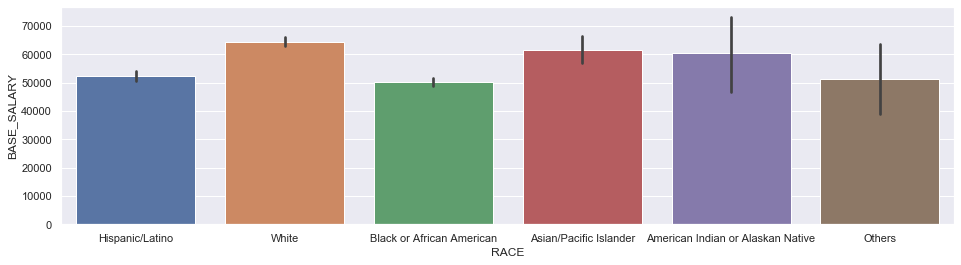

In [91]:
# 11.6.5  sns의 barplot을 이용해서 인종별 급여 평균을 도식화 한다. 
ax = sns.barplot(x='RACE', y='BASE_SALARY', data=employee) # x 인종별, y 연봉
ax.figure.set_size_inches(16, 4)  # 크기 조정
# barplot이 집계 기능을 수행한다. 가운데 직선은 데이터 분산의 크기를 보여준다.

Text(0, 0.5, 'Mean Salary')

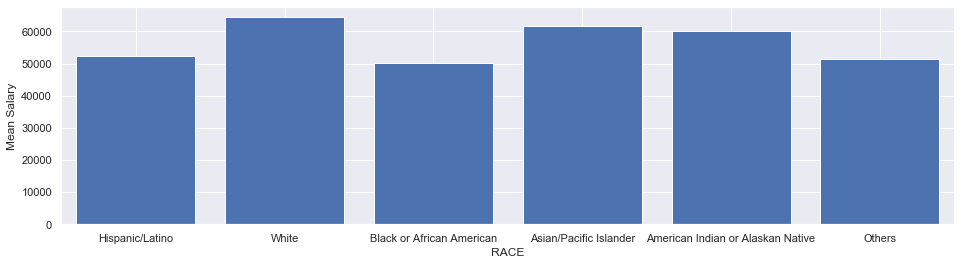

In [92]:
# 11.6.6 DataFrame에서 plot을 하려면 마찬가지로 집계를 먼저 수행해야 한다. (groupby)
avg_sal = employee.groupby('RACE', sort=False)['BASE_SALARY'].mean()
# 차트 시각화를 위해서 설정을 조정한다. 
ax = avg_sal.plot(kind='bar', rot=0, figsize=(16,4), width=.8)  #width=.8은 막대간 간격
ax.set_xlim(-.5, 5.5)     # X 축 의 범위
ax.set_ylabel('Mean Salary') # y축 레이블

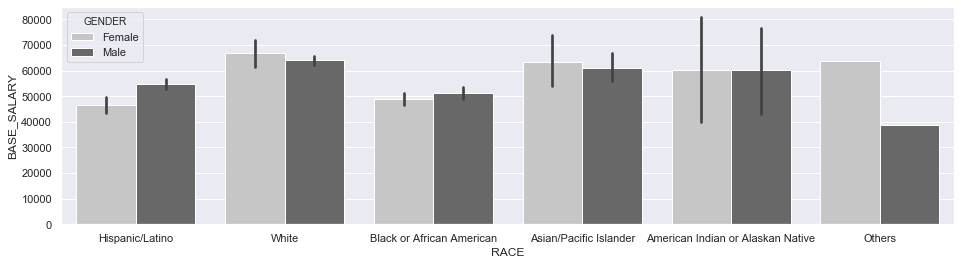

In [93]:
# 11.6.7 sns의 hue 패러미터를 이용해서 성별로 그루핑한 막대 그래프를 표현해보자. 
ax = sns.barplot(x='RACE', y='BASE_SALARY', hue='GENDER', 
                 data=employee, palette='Greys')
ax.figure.set_size_inches(16,4)

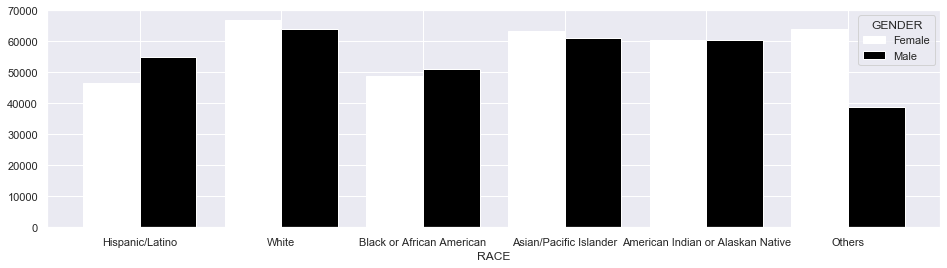

In [94]:
# 11.6.8 DataFrame에서 표현하려면 복수개의 그루핑 함수로 데이터를 집계한 다음
#       unstack하여 데이터를 준비한다. 
employee.groupby(['RACE', 'GENDER'], sort=False)['BASE_SALARY'] \
        .mean().unstack('GENDER') \
        .plot(kind='bar', figsize=(16,4), rot=0,
              width=.8, cmap='Greys')

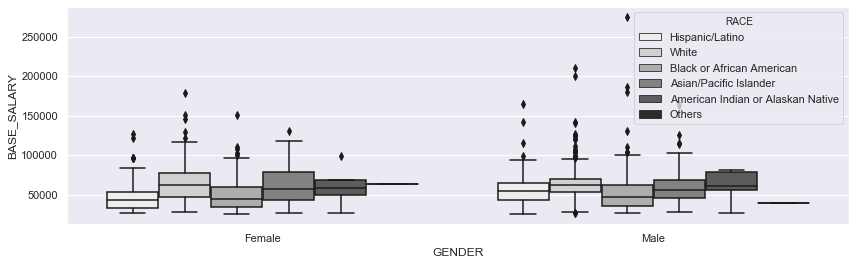

In [95]:
# 11.6.9 sns로 성별 인종별 연봉 분포를 boxplot으로 살펴본다. 
ax = sns.boxplot(x='GENDER', y='BASE_SALARY', data=employee, hue='RACE', palette='Greys')
ax.figure.set_size_inches(14,4)

Text(0.5, 0.98, '')

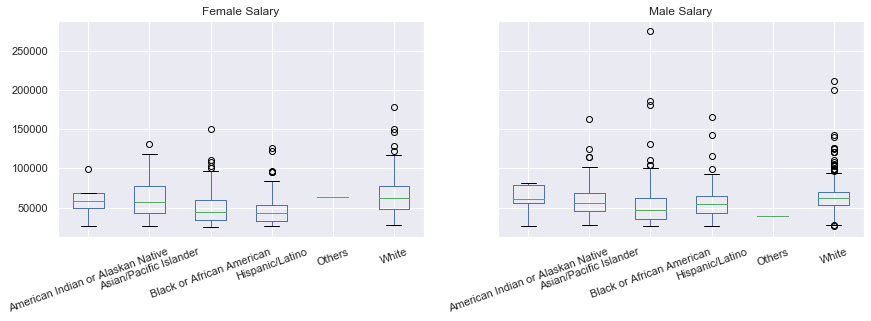

In [96]:
# 11.6.10 DataFrame으로 표현 하려면 2개의 subplot을 사용하고, sharey = True로 세팅한다. 
# 각 ax에 성별로 boxplot을 출력한다. 
#  Seaborn 에 비해 코딩이 많이 복잡하다. 
fig, ax_array = plt.subplots(1, 2, figsize=(14,4), sharey=True)
for g, ax in zip(['Female', 'Male'], ax_array):
    employee.query('GENDER== @g') \
            .boxplot(by='RACE', column='BASE_SALARY', ax=ax, rot=20)
    ax.set_title(g + ' Salary')
    ax.set_xlabel('')
fig.suptitle('')

# >> How it works...

Text(0.5, 0.98, '')

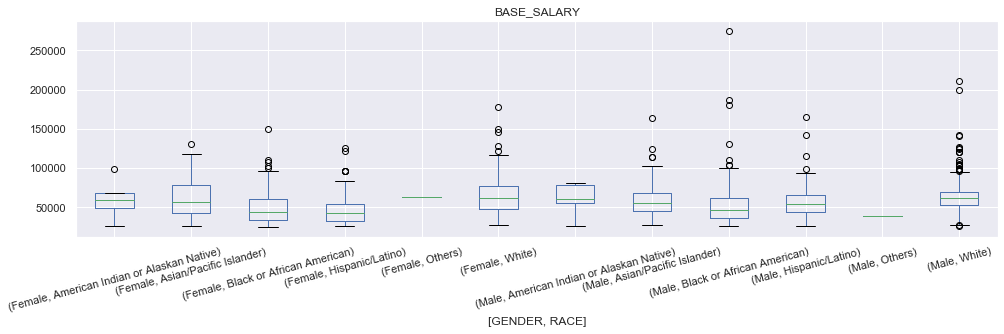

In [97]:
# 11.6.10의 boxplot을 하나로 표현하기 위해 by=['GENDER', 'RACE']로 지정할 수 있지만
#       가독성 면에서 만족 스럽지 못하다. 
ax = employee.boxplot(by=['GENDER', 'RACE'], 
                      column='BASE_SALARY', 
                      figsize=(16,4), rot=15)
ax.figure.suptitle('')

# 11.7 Doing multivariate analysis with seaborn grids

In [98]:
### [Tech] Seaborn Grid의 활용 : seaborn은 Grid 기능을 이용해서 변수간의 관계를 
###       한번에 분석해주는 기능을 갖고 있다. 
###       factorplot, lmplot, pariplot, jointplot, clustermap
### [Goal] employee의 연차별 급여수준에 대해서 시각화하여 분석해보자.(수치형)


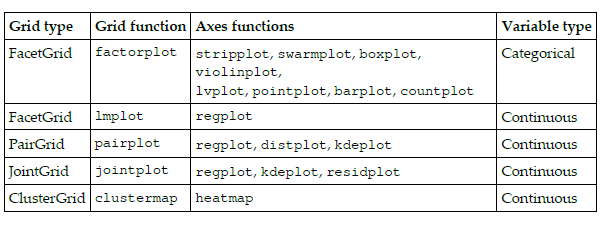

# >> How to do it...

In [99]:
# 11.7.1 employee를 load 하고, 연차 정보를 'YEARS_EXPERIENCE'로 구성한다. 

# employee 를 load, 인덱스 없고 HIRE_DATE, JOB_DATE는 datetime으로 읽어들임
employee = pd.read_csv('data/employee.csv', 
                       parse_dates=['HIRE_DATE', 'JOB_DATE'])

# 2016년 12월 1일 기준 재직한 일자를 구한다. 
days_hired = (pd.to_datetime('12-1-2016') - employee['HIRE_DATE'])

one_year = pd.Timedelta(1, unit='Y')  # 1년이라는 단위를 지정하고, 
employee['YEARS_EXPERIENCE'] =  days_hired / one_year  # 근속년수를 계산한다. 
employee[['HIRE_DATE', 'YEARS_EXPERIENCE']].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: M and Y units are deprecated and will be removed in a future version.
  # Remove the CWD from sys.path while we load stuff.


,HIRE_DATE,YEARS_EXPERIENCE
0,2006-06-12,10.472494
1,2000-07-19,16.369946
2,2015-02-03,1.826184
3,1982-02-08,34.812488
4,1989-06-19,27.452994


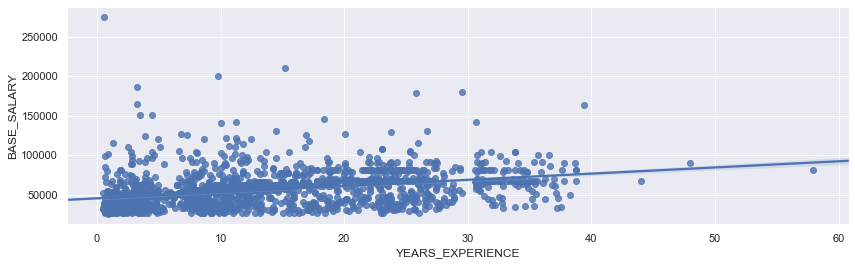

In [100]:
# 11.7.2 회귀선을 포함한 산포도를 그려본다. (sns.regplot() - Axes Function)
ax = sns.regplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                 data=employee)
ax.figure.set_size_inches(14,4)

seaborn.axisgrid.FacetGrid

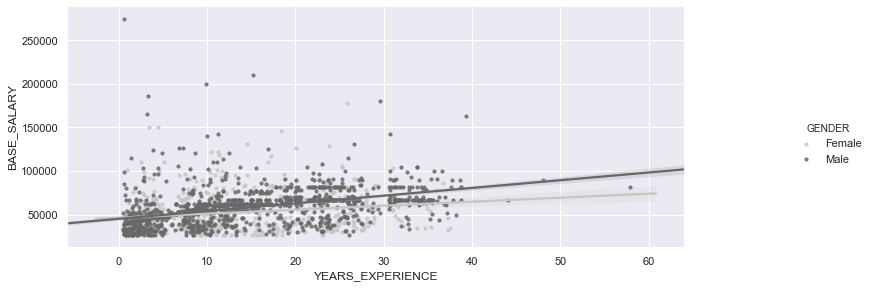

In [101]:
# 11.7.3 그룹별 회귀선을 그릴 수 있는 산포도를 작성한다. (sns.lmplot() - Grid Function)
grid = sns.lmplot(x='YEARS_EXPERIENCE', 
                  y='BASE_SALARY',
                  hue='GENDER', 
                  palette='Greys',
                  scatter_kws={'s':10}, 
                  data=employee)
grid.fig.set_size_inches(14, 4)
type(grid)

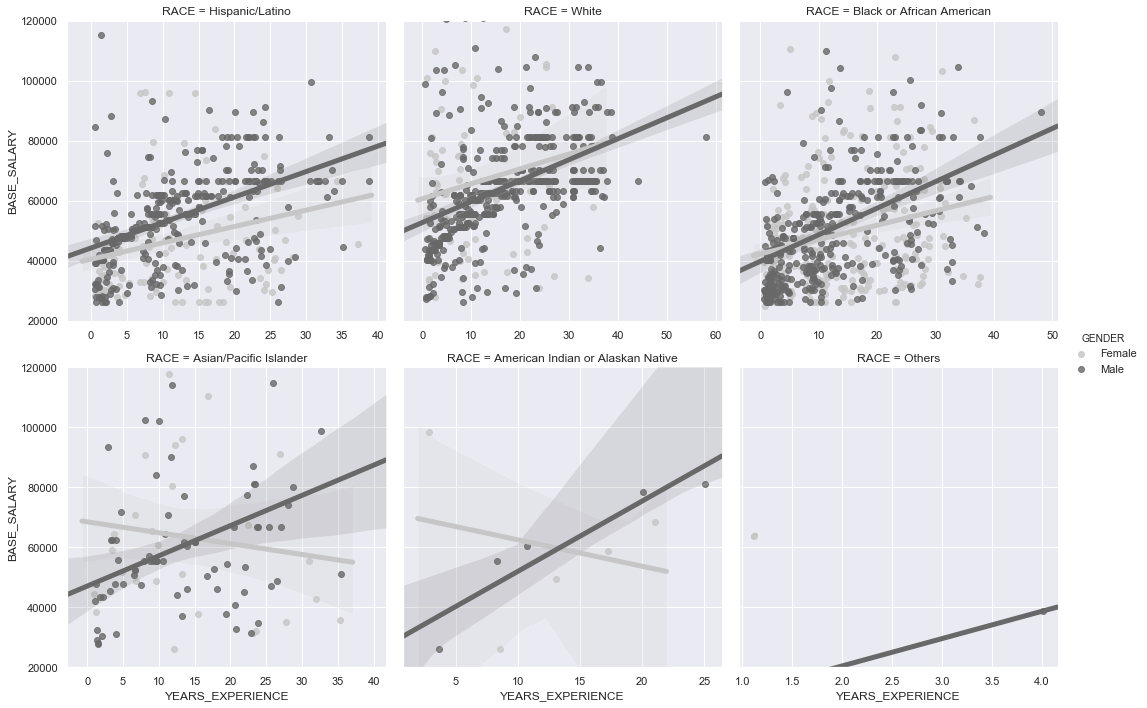

In [102]:
# 11.7.4 인종별 성별 회귀선을 포함한 산포도를 그린다.
grid = sns.lmplot(x='YEARS_EXPERIENCE', 
                  y='BASE_SALARY',
                  hue='GENDER', 
                  col='RACE',    # 복수 개의 axe로 인종별로 작성한다.  
                  col_wrap=3,    # column 은 3개
                  palette='Greys', 
                  sharex=False,  # X축은 공유하지 않음
                  line_kws = {'linewidth':5},
                  data=employee)
grid.set(ylim=(20000, 120000)) # Y 축 범위 지정 (공유)

# >> There's more...11.7

In [103]:
# 범주형 데이터 
deps = employee['DEPARTMENT'].value_counts().index[:2]  # 인원수 상위 2개 부서 
races = employee['RACE'].value_counts().index[:3]  # 인원수 상위 3개 인종
is_dep = employee['DEPARTMENT'].isin(deps)  # 상위 2개 부서 포함여부
is_race = employee['RACE'].isin(races)  # 상위 3개 인종 포함 여부
emp2 = employee[is_dep & is_race].copy()  # 상위 2개 부서 및 상위 3개 인종에 속한 직원

emp2['DEPARTMENT'] = emp2.DEPARTMENT.str.extract('(HPD|HFD)', expand=False) 
# 부서명을 간략한 형태로 수정한다.   expand=True는 DataFrame화 여부 ()
display (emp2.tail())
emp2.shape

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,YEARS_EXPERIENCE
1994,1994,POLICE CAPTAIN,HPD,104455.0,Black or African American,Full Time,Male,Active,1983-02-07,2004-07-08,33.815889
1995,1995,POLICE OFFICER,HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09,2.480544
1996,1996,COMMUNICATIONS CAPTAIN,HFD,66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06,13.248732
1997,1997,POLICE OFFICER,HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13,2.135567
1999,1999,FIRE FIGHTER,HFD,51194.0,Hispanic/Latino,Full Time,Male,Active,2009-01-12,2010-07-12,7.885172


(968, 11)

In [104]:
# 조건을 충족한 인원의 부서별 데이터 건수
emp2['DEPARTMENT'].value_counts()

HPD    591
HFD    377
Name: DEPARTMENT, dtype: int64

In [105]:
# 조건을 충족한 인원의 부서별 인종 건수
emp2['RACE'].value_counts()

White                        478
Hispanic/Latino              250
Black or African American    240
Name: RACE, dtype: int64

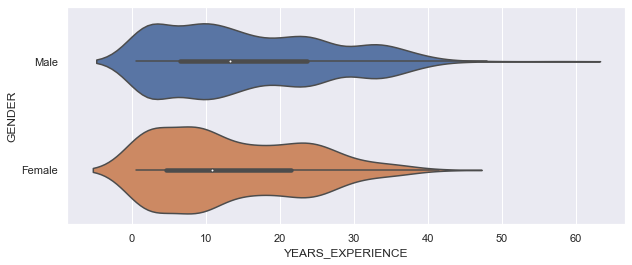

In [106]:
#  이번엔 각 부서인원이 50명 이상인 부서에 소속한 임직원에 성별로 연차 분포를 살펴본다.
#   (violineplot - Axes function)

 # 부서인원 50명 이상 부서 소속 직원을 필터
common_depts = employee.groupby('DEPARTMENT')\
                        .filter(lambda x : len(x) > 50)
# x :연차 분포 (수치),  y : 성별 (범주) 의 violine plot 
#  x, y 축에서 범주형을 x, y 중 어느쪽에 배치하는가에 따라 세로/가로가 변경된다. 
ax = sns.violinplot(x = 'YEARS_EXPERIENCE', y='GENDER', data=common_depts)
ax.figure.set_size_inches(10,4)

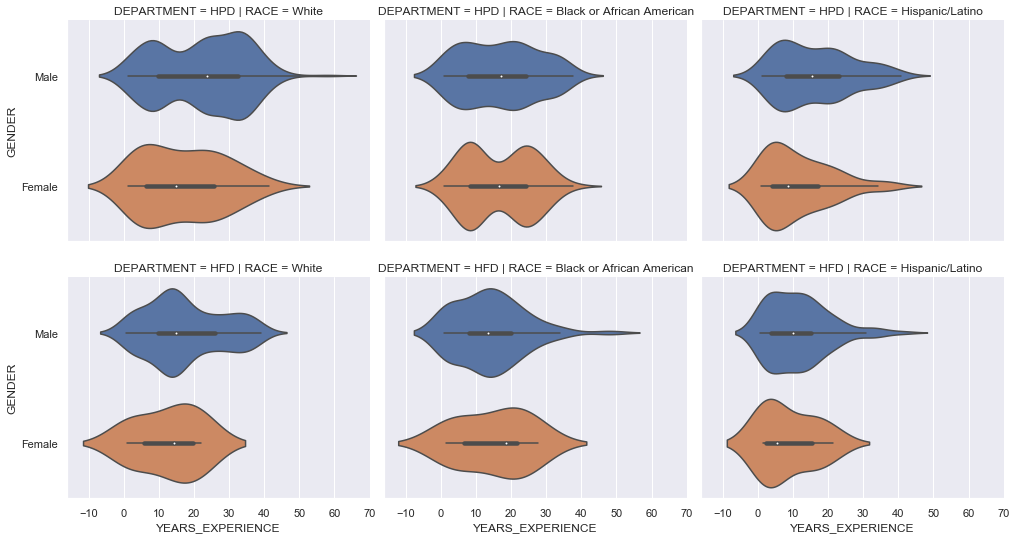

In [107]:
# 인종별로, 부서별로 분리하여 violine plot을 수행해본다. 
#  (catplot(,,kind = 'violin')  - Grid Function, 구 factorplot)

"""
# factorplot 이 deprecated 될 예정이고, 대신 catplot으로 변경 된다. 
sns.factorplot(x ='YEARS_EXPERIENCE', y='GENDER',
               col='RACE', row='DEPARTMENT', 
               height=3, aspect=2,
               data=emp2, kind='violin')
"""

ax_array = sns.catplot(x ='YEARS_EXPERIENCE', y='GENDER',
               col='RACE', row='DEPARTMENT', 
               height=3, aspect=2,
               data=emp2, kind='violin');
ax_array.fig.set_size_inches(14,8)

# 11.8 Uncovering Simpson's paradox in the diamonds dataset with seaborn

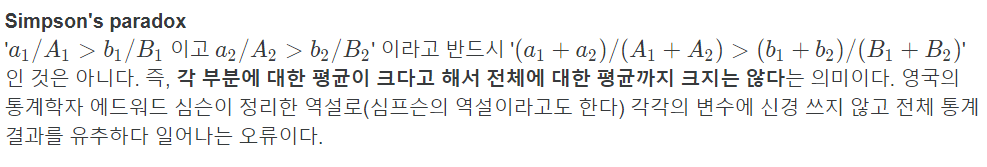

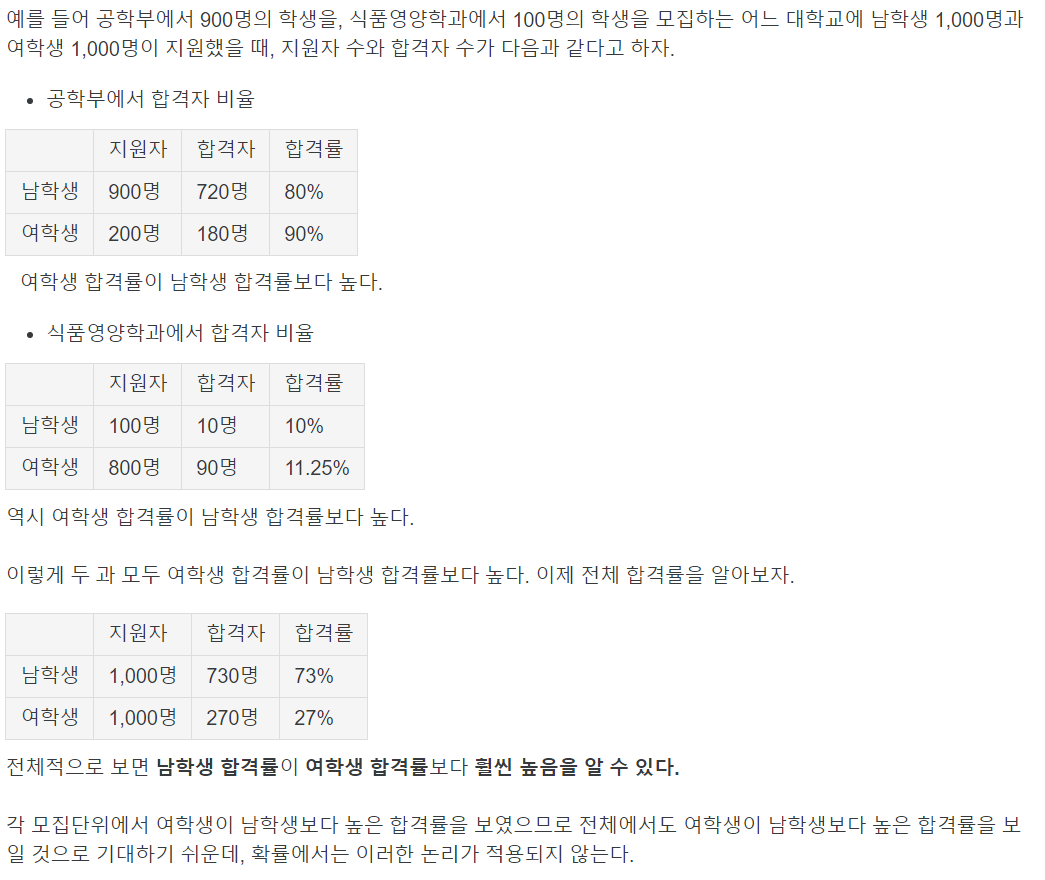

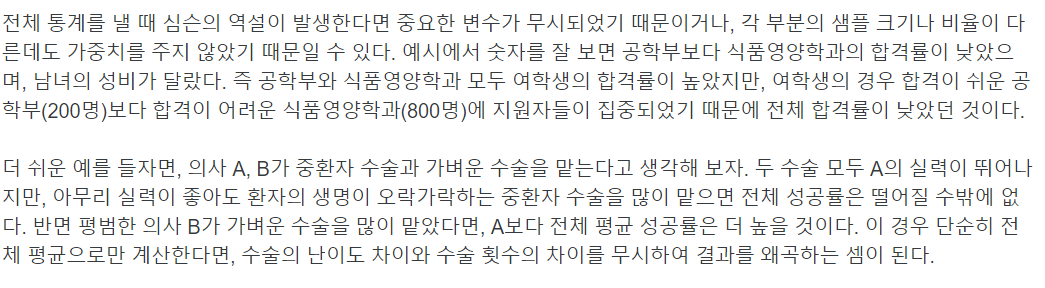

In [108]:
# 참조 나무위키
#   https://namu.wiki/w/%EC%8B%AC%EC%8A%A8%EC%9D%98%20%EC%97%AD%EC%84%A4
#  통계분석 수행시에 인자에 영향을 미치는 중요한 그룹에 대해서 샘플 개수가 크게 차이가 나거나 
#  여타 이유로 전체 평균으로만 비교하면, 엉뚱한 결과가 나올 수 있다.

In [109]:
### [Tech]심슨의 역설이 발생 할 수 있으니 시각화 과정에서 샘플의 크기를 확인하며 분석을 진행한다
### [Goal] 다이아몬드 특성과 가격을 정리한 데이터 셋을 분석한다.  
###        단순 집계를 하면 다이아몬드 특성이 높을 수록 가격이 낮아지는 현상에 대해 
###        주의깊게 분석해본다. 

# >> Getting Ready

In [110]:
# 학생 A와 B의 정답율을 보면 학생 A는 50% B는 80%로 B가 더 잘 한 것으로 보인다. 
pd.DataFrame(index=['Student A', 'Student B'], 
             data={'Raw Score': ['50/100', '80/100'], 
                   'Percent Correct':[50,80]}, columns=['Raw Score', 'Percent Correct'])

,Raw Score,Percent Correct
Student A,50/100,50
Student B,80/100,80


In [111]:
# 문제의 종류별로 유형화 해서 보면 결과가 달라진다. 
# A는 B 보다 어려운 문제를 많이 풀었다.  전체 100문제중 95문제를 어려운 문제를 풀었다. 
# B는 쉬운 문제로 95문제를 풀었다.  학생 A는 쉬운 문제 5문항은 다 맞추고 어려운 문제에서도
# 47% 정답율로, B의 40% 보다 정답율이 높다. 
# 중요한 범주에 대해서 sample 크기에 따른 비중이 다를때 조정이 없으면 엉뚱한 결과가 나올 수 있다. 

pd.DataFrame(index=['Student A', 'Student B'], 
             data={'Difficult': ['45/95', '2/5'], 
                   'Easy': ['5/5', '78/95'],
                   'Difficult Percent': [47, 40],
                   'Easy Percent' : [100, 82],
                  'Total Percent':[50, 80]}, 
             columns=['Difficult', 'Easy', 'Difficult Percent', 
                      'Easy Percent', 'Total Percent'])

,Difficult,Easy,Difficult Percent,Easy Percent,Total Percent
Student A,45/95,5/5,47,100,50
Student B,2/5,78/95,40,82,80


# >> How to do it...

In [112]:
# 11.8.1 diamond.csv로 부터 diamond를 읽어들인다. 
#  다이아몬드의 품질과 가격에 대해 상관관계를 분석해 보자.
diamonds = pd.read_csv('data/diamonds.csv')
display(diamonds.head())
diamonds.shape

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


(53940, 10)

In [113]:
# 11.8.2 범주형 컬럼에 대한 순서를 정하기위해 카테고리화 한다. 
#   뒤로 갈 수로 좋은 다이아몬드이다. 
cut_cats = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']  # 커팅
color_cats = ['J', 'I', 'H', 'G', 'F', 'E', 'D']  # 색상
clarity_cats = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']  # 투명도

diamonds['cut'] = pd.Categorical(diamonds['cut'],
                                 categories=cut_cats, 
                                 ordered=True)   # 커팅

diamonds['color'] = pd.Categorical(diamonds['color'],
                                   categories=color_cats, 
                                   ordered=True) # 색상

diamonds['clarity'] = pd.Categorical(diamonds['clarity'],
                                     categories=clarity_cats, 
                                     ordered=True) # 투명도

Text(0.5, 0.98, 'Price Decreasing with Increasing Quality?')

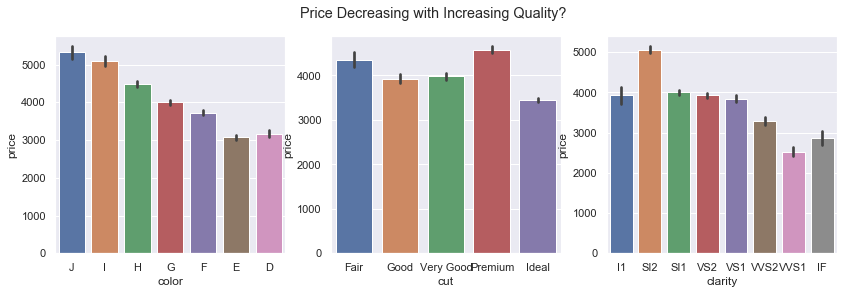

In [114]:
# 11.8.3 범주형 컬럼에 대해서 데이터 분포를 살펴본다. 

# figure, axe 설정 (3개 컬럼)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))

# 색상과 가격
sns.barplot(x='color', y='price', data=diamonds, ax=ax1)

# 커팅과 가격
sns.barplot(x='cut', y='price', data=diamonds, ax=ax2)

# 투명도와 가격
sns.barplot(x='clarity', y='price', data=diamonds, ax=ax3)

# 차트 제목
fig.suptitle('Price Decreasing with Increasing Quality?')

# ==> 예상과 다르게 색상, 커팅, 투명도가 높다고 가격이 높게 나타나지 않는다. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


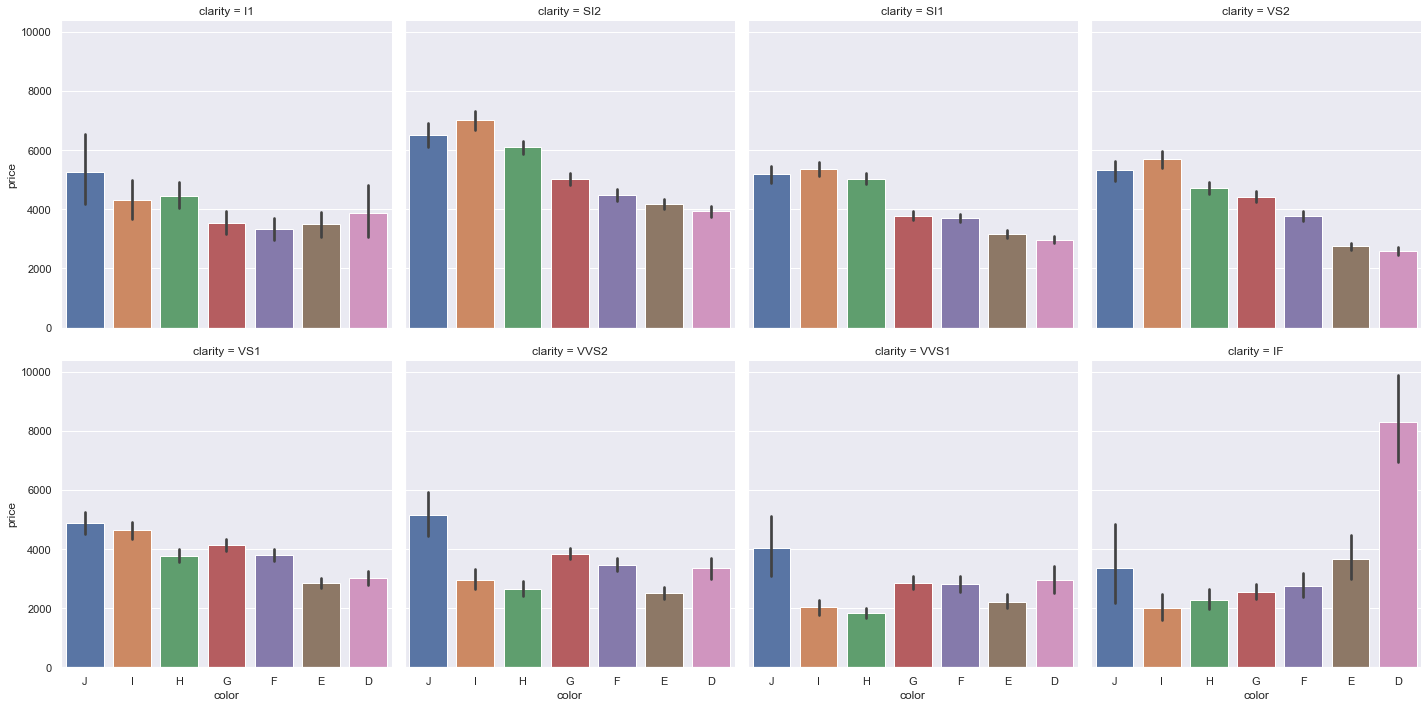

In [115]:
# 11.8.4 투명도 별로 색상과 가격의 관계를 살펴 보자.
sns.factorplot(x='color', y='price', col='clarity',
               col_wrap=4, data=diamonds, kind='bar')

# ==> 낮은 투명도 등급 (I1 ~ VS1)에서는 여전히 좋은 색상이수록 가격이 떨어지는 현상이 보이지만
#     높은 투명도 등급에서는 (IF) 색상 등급이 높을 수록 가격도 비싸진다. 

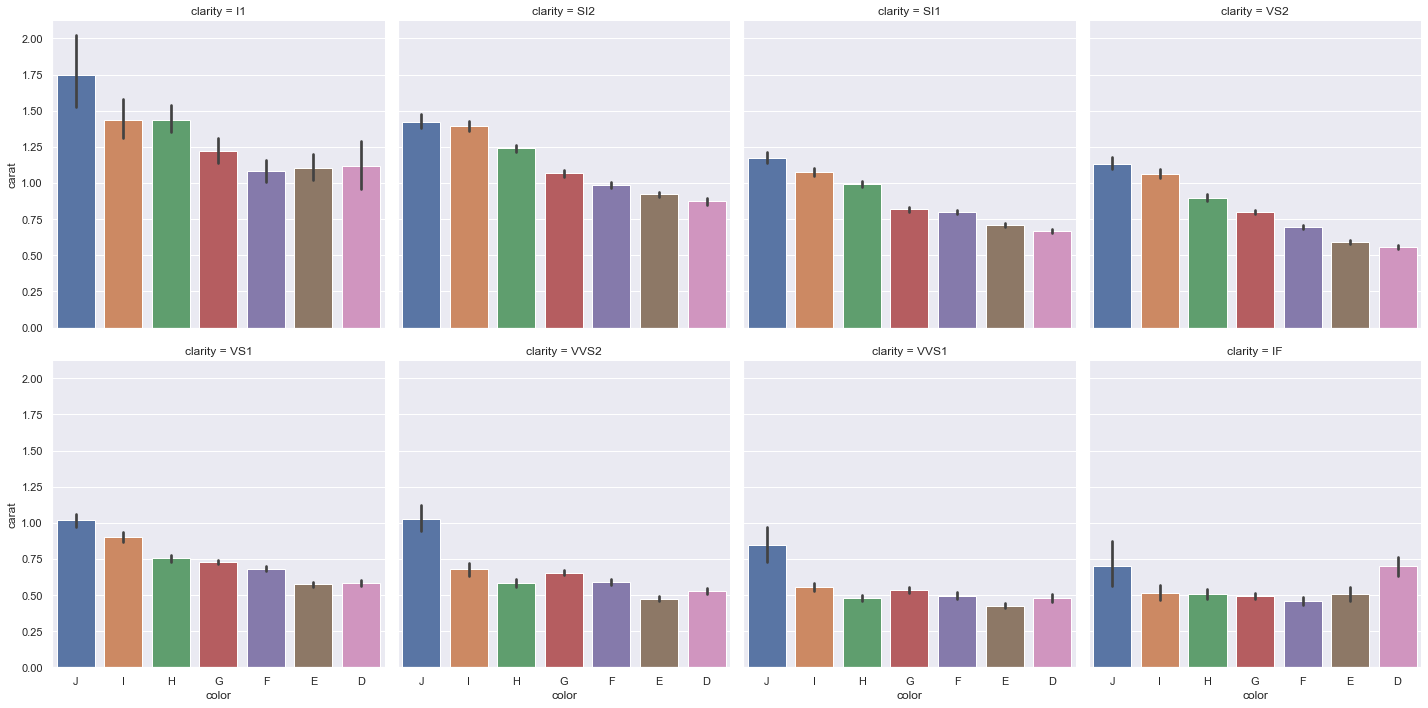

In [116]:
# y축을 가격 대신 캐럿 크기로 바꾸어 그려본다. 
sns.factorplot(x='color', y='carat', col='clarity',
               col_wrap=4, data=diamonds, kind='bar')
## ==> 색상 등급이 높을 수록 (각 차트에서 오른쪽 항목으로 갈 수록),
##     투명도 등급이 높을 수록   ( 오른쪽 아래 차트로 갈수록 ),
##     캐럿이 작아지는 경향을 확인 할 수 있다. 
##     즉 고급 다이아몬드일 수록 캐럿이 작은 경향이 있다. 

Text(0.5, 0.98, 'Diamond size decreases with quality')

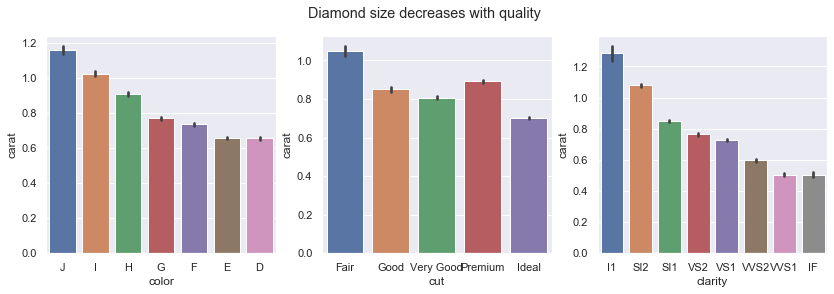

In [117]:
# 11.8.5 확인을 위해 색상, 커팅, 투명도와 캐럿의 관계를 막대 그래프로 확인해 보자. 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x='color', y='carat', data=diamonds, ax=ax1)  # 색상 vs. 캐럿
sns.barplot(x='cut', y='carat', data=diamonds, ax=ax2)    # 커팅 vs. 캐럿
sns.barplot(x='clarity', y='carat', data=diamonds, ax=ax3)  # 투명도 vs. 캐럿

# 차트 제목 - 다이아몬드의 품질이 높아질 수록 크기가 작아진다. 
fig.suptitle('Diamond size decreases with quality')

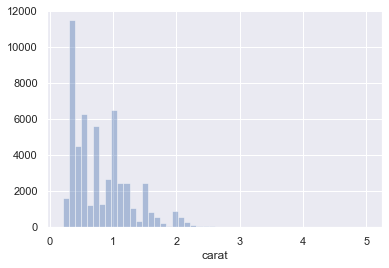

In [118]:
# 11.8.6  다이아몬드의 크기가 가격에 중요한 요소로 작용할 것이다. 
#         다이아몬드 크기별로 5개 구역으로 나누어서 분석을 진행 해보자.

sns.distplot ( diamonds.carat, kde = False)

Text(0.5, 1.02, 'Diamond price by size, color and clarity')

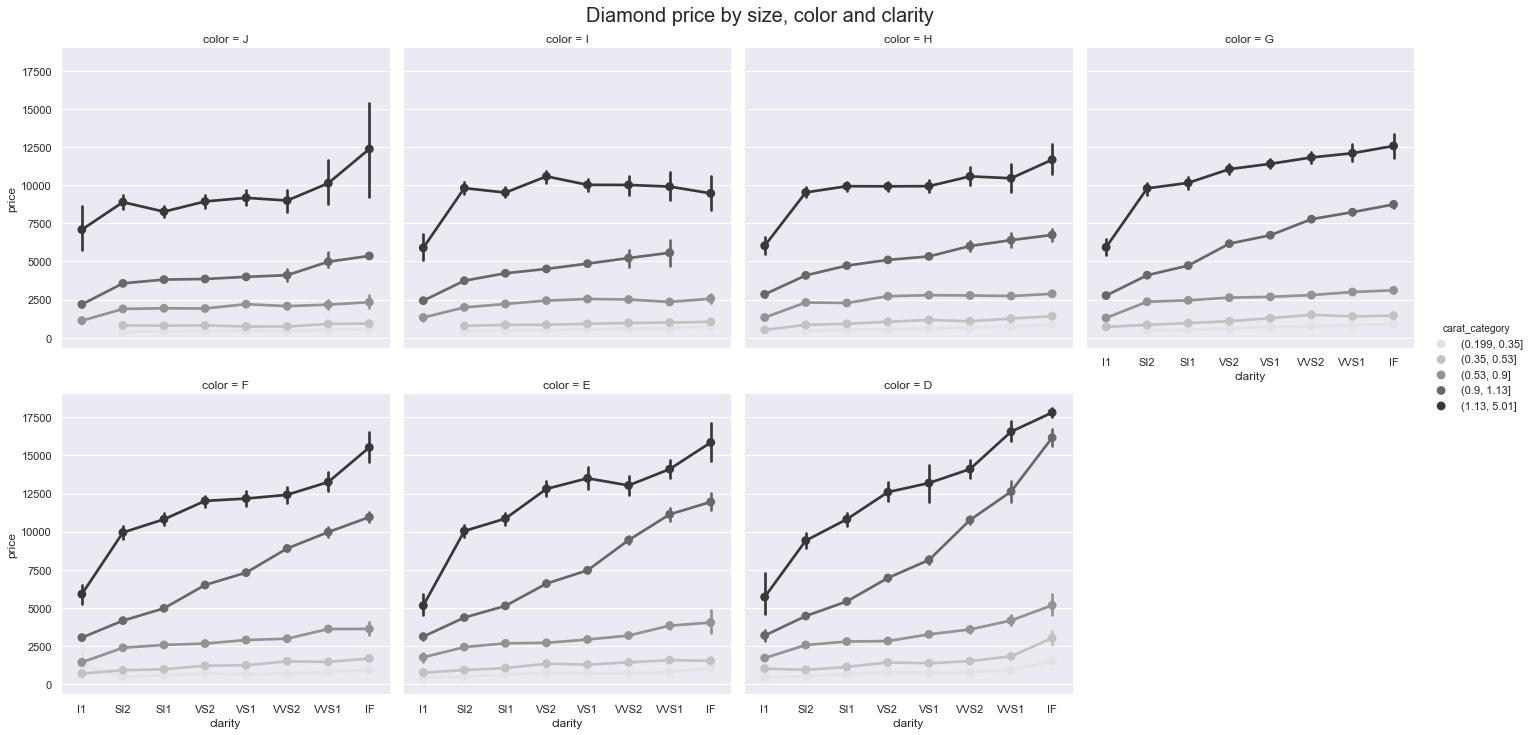

In [119]:
# 크기에 따라 5개 그룹으로 나누고 'carat_category' 컬럼에 저장한다.  
diamonds['carat_category'] = pd.qcut(diamonds.carat, 5)

# 회색 색상 정의
from matplotlib.cm import Greys
greys = Greys(np.arange(50,250,40))

# 이번에는 색상별로 차트를 그리고 각 차트는 투명도별로 가격을 표현한다. 
#   단, 캐럿의 크기구분 별로 구분하여 표현한다.  
g = sns.factorplot(x='clarity', y='price', data=diamonds,
                   hue='carat_category', col='color', 
                   col_wrap=4, kind='point', palette=greys)

#  다이아몬드의 가격 - 크기, 색상, 투명도 제목을 출력한다. 
g.fig.suptitle('Diamond price by size, color and clarity',
               y=1.02, size=20)


# --> 다이아몬드의 캐럿을 구간으로 구분하여  가격추이를 보면 
#     품질이 좋을 수록 가격이 높아진다. 

# >> There's more... 11.8

Text(0.5, 1.02, 'Replication of Step 3,5 with PairGrid')

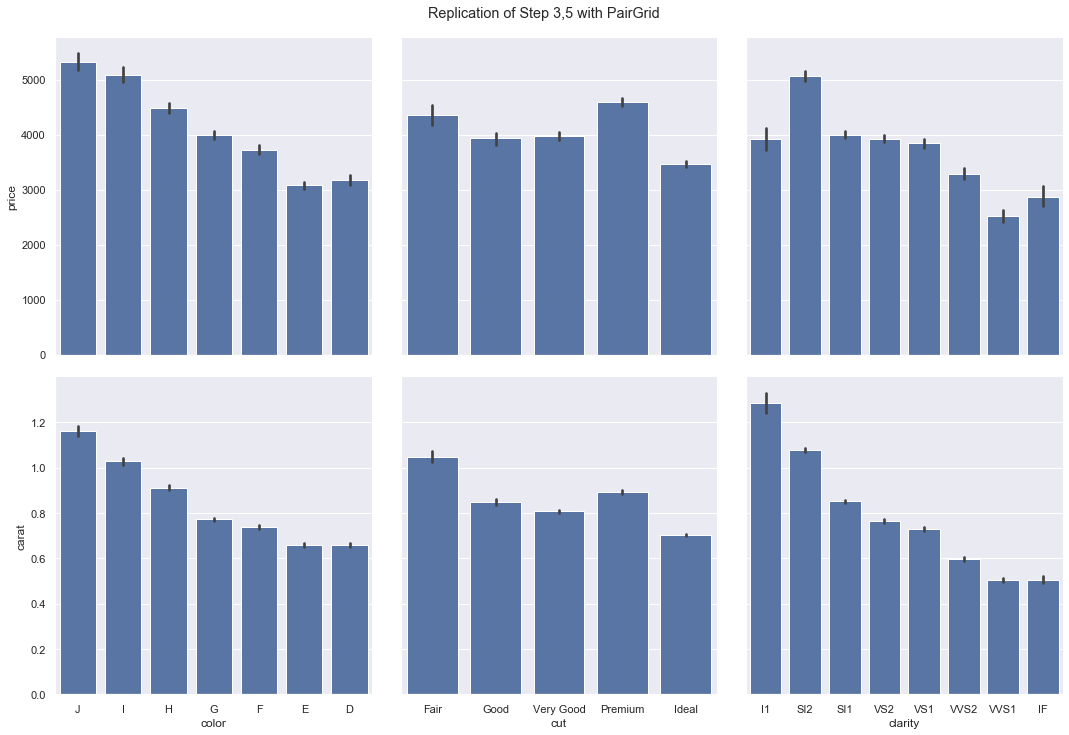

In [120]:
# 11.8.3, 11.8.5 의 그림을 한 번에 seaborn으로 그리기 위해서 
#  PairGrid를 사용할 수 있다. 
g = sns.PairGrid(diamonds,   # DataFrame
                 height=5,
                 x_vars=["color", "cut", "clarity"],  #  각 차트의 x 축 컬럼
                 y_vars=["price", 'carat'])                   # Y 축 컬럼
g.map(sns.barplot)     # 막대 차트 지정
g.fig.suptitle('Replication of Step 3,5 with PairGrid', y=1.02)